**INTRODUCCION ANALISIS EXPLORATORIO DE DATOS**

El 15 de Abril de 1912 el Titanic se hundio luego de chocar con un Iceberg.

Murieron 1502 de los 2224 pasajeros y tripulantes.



**PassengerId:** Es el id del pasajero

**Survived:** Es la variable target que intentamos predecir(0 or 1)

1 = Sobrevivio 0 = No Sobrevivio

**Pclass: (Passenger Class)** es la clase socio-economica del pasajero y corresponde a una caracteristica ordinal categorica con solo 3 valores (1, 2 or 3):

1 = Clase Alta

2 = Clase Media

3 = Clase Baja

**Name, Sex and Age:** significado obvio

**SibSp:** Hermanos y esposa

**Parch:** Padres e hijos

**Ticket:** Numero de ticket del pasajero

**Fare:** Tarifa del pasaje

**Cabin:** numero de cabina del pasajero

**Embarked:** puerto de embarque es una caracteristica categorica con 3 unicos valores (C, Q or S):

C = Cherbourg Q = Queenstown S = Southampton

In [203]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')
SEED = 42

In [204]:
def concat_df(train_data, test_data):
    # Returna un dataframe concatenado con los conjuntos de entrenamiento y prueba
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returna dfs divididos de los conjuntos de entrenamiento y prueba
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train = pd.read_csv('/content/drive/MyDrive/CTIC_UNI/DATA_SCIENCE/COURSE_01_MAY_2022/SESION01/titanic_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CTIC_UNI/DATA_SCIENCE/COURSE_01_MAY_2022/SESION01/titanic_test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Conjunto de entrenamiento'
df_test.name = 'Conjunto de prueba'
df_all.name = 'Conjunto Total' 

dfs = [df_train, df_test]
#print(df_test.shape)

print('Numero de ejemplos de entrenamiento = {}'.format(df_train.shape[0]))
print('Numero de ejemplos de prueba = {}\n'.format(df_test.shape[0]))
print('Entrenamiento X Shape = {}'.format(df_train.shape))
print('Entrenamiento y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Prueba X Shape = {}'.format(df_test.shape))
print('Prueba y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Numero de ejemplos de entrenamiento = 891
Numero de ejemplos de prueba = 418

Entrenamiento X Shape = (891, 12)
Entrenamiento y Shape = 891

Prueba X Shape = (418, 11)
Prueba y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [205]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [206]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [207]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


**¿Cual es nuestro target?**

Quienes sobrevivieron y cual fue la razon de que sobrevivan. Como influyeron las diversas variables para la supervivencia de una persona.

In [208]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [209]:
df_train.groupby(['Survived']).mean() # 0->No sobrevivieron 1->Sobrevivieron

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [210]:
df_train.groupby(['Survived']).count() # 0->No sobrevivieron 1->Sobrevivieron

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


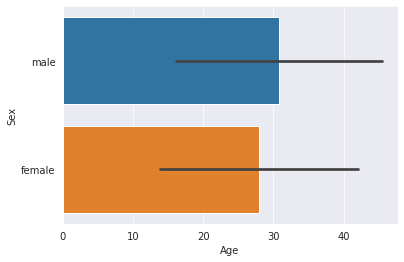

In [211]:
sns.barplot(x=df_train['Age'], y=df_train['Sex'], ci = 'sd') #intervalo de confianza puede ser None o un flotante
plt.show()

In [212]:
df_train.groupby(['Sex']).mean() #Sex es categorica 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [213]:
df_train.groupby(['Sex']).std()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,256.846324,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698
male,257.486139,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263


Text(0, 0.5, 'Cantidad de Pasajeros')

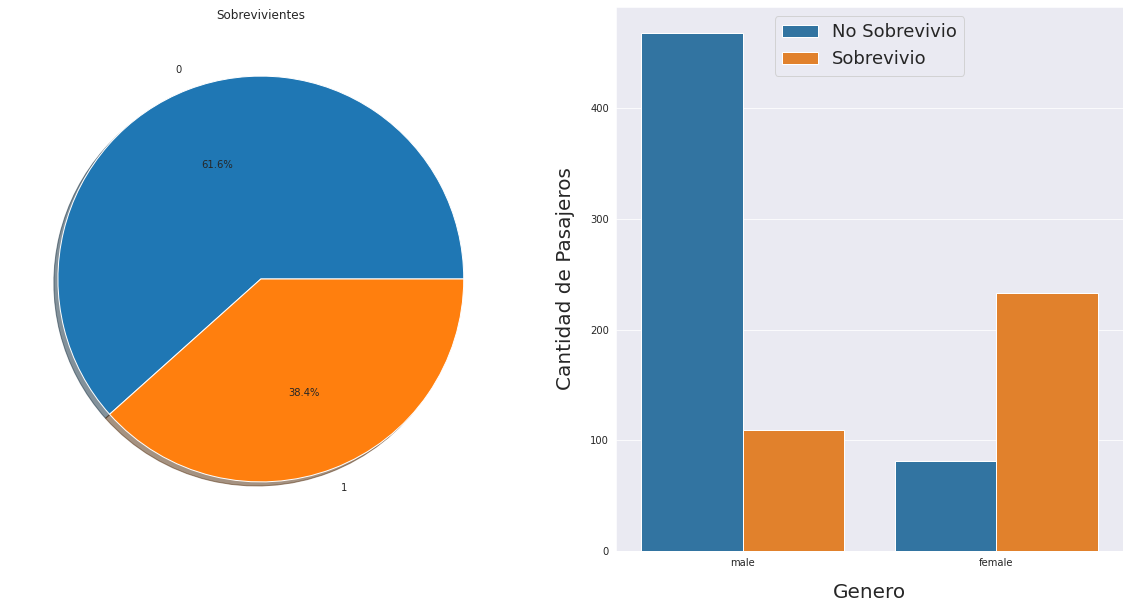

In [214]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10)) #En una fila dos graficos
df_train['Survived'] .value_counts()
df_train['Survived'] .value_counts().plot.pie(autopct = '%1.1f%%', ax =axs[0], shadow = True)

axs[0].set_title('Sobrevivientes')
axs[0].set_ylabel('')

#sns.countplot('Sex', hue = 'Survived', data = df_train, ax = axs[1])
sns.countplot(x='Sex', hue='Survived', data=df_train, ax = axs[1]) #Se agrupa por Survived
plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper center', prop={'size': 18})
plt.xlabel('Genero', size=20, labelpad=15)
plt.ylabel('Cantidad de Pasajeros', size=20, labelpad=15)


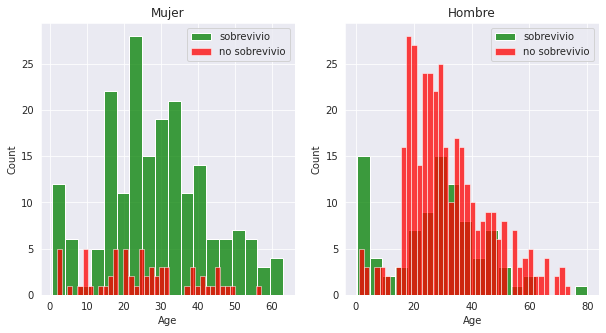

In [215]:
sobrevivio = 'sobrevivio'
no_sobrevivio = 'no sobrevivio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 5)) #En una fila dos graficos
mujeres = df_train[df_train['Sex'] == 'female']
hombres = df_train[df_train['Sex'] == 'male']

ax = sns.histplot(mujeres[mujeres['Survived'] == 1].Age.dropna(), bins=18, label=sobrevivio, color='green', ax=axes[0], kde=False)
ax = sns.histplot(mujeres[mujeres['Survived'] == 0].Age.dropna(), bins=40, label=no_sobrevivio, color='red', ax=axes[0], kde=False)
ax.legend()
ax.set_title('Mujer')

ax = sns.histplot(hombres[hombres['Survived'] == 1].Age.dropna(), bins=18, label=sobrevivio, color='green', ax=axes[1], kde=False)
ax = sns.histplot(hombres[hombres['Survived'] == 0].Age.dropna(), bins=40, label=no_sobrevivio, color='red', ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Hombre')


**I ANALISIS DE VARIABLES O CARACTERISTICAS:**

Analizemos las caracteristicas de algunas variables, identifiquemos su tipo y su impacto en la supervicencia. 

Variable categorica: Sexo o Genero (Sex)

Variable ordinal: Clase (Pclass)

Variable continua: Edad (Age)


**SEX**

In [216]:
df_all['PassengerId'].count()

1309

In [217]:
df_train['PassengerId'].count()

891

In [218]:
df_test['PassengerId'].count()

418

In [219]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [220]:
df_all.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

        Survived
Sex             
female  0.742038
male    0.188908


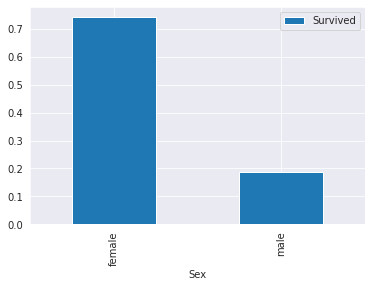

In [221]:
#Promedio de hombres y mujeres sobrevivientes
#Observemos que Sex aun la manejamos como variable categorica
print(df_all[['Sex','Survived']].groupby('Sex').mean())
df_all[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

**PCLASS**

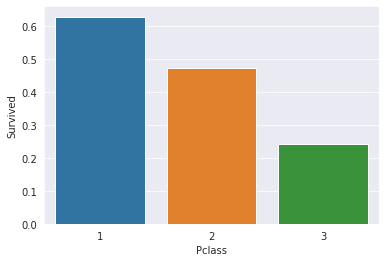

In [222]:
sns.barplot(data=df_all, x='Pclass', y='Survived', ci = None)
plt.show()

In [223]:
pd.crosstab(df_all['Pclass'],df_all['Survived'], margins=True).style.background_gradient(cmap = 'Greens')

Survived,0.0,1.0,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


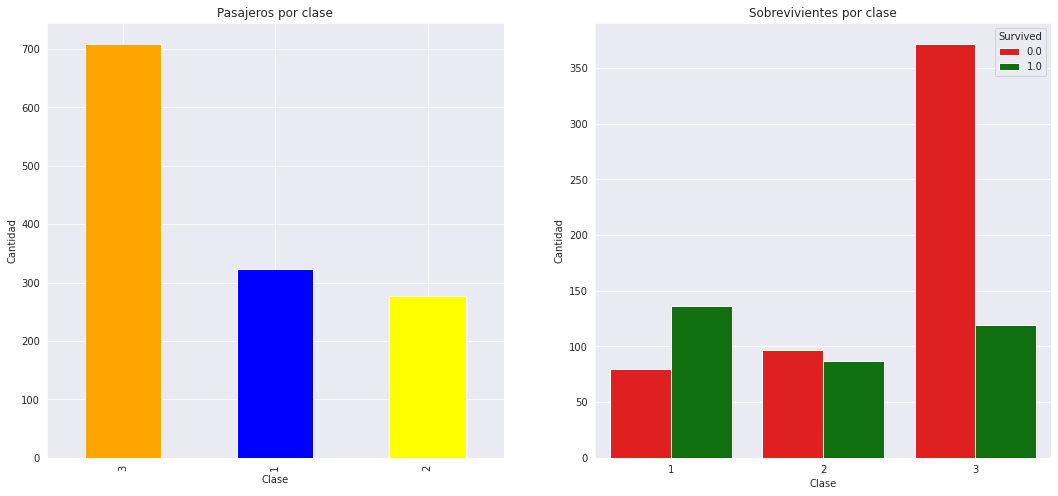

In [224]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8))
df_all['Pclass'] .value_counts().plot.bar(ax =axs[0], color = ['orange', 'blue', 'yellow'])
axs[0].set_title('Pasajeros por clase')
axs[0].set_xlabel('Clase')
axs[0].set_ylabel('Cantidad')

sns.countplot('Pclass', hue = 'Survived', data = df_all, ax = axs[1], palette=['red',"green"])
axs[1].set_title('Sobrevivientes por clase')
axs[1].set_xlabel('Clase')
axs[1].set_ylabel('Cantidad')

plt.show()

**IMPACTO DEL SEXO Y LA CLASE:**

In [225]:
pd.crosstab([df_all['Sex'], df_all['Survived']], df_all['Pclass'], margins = True).style.background_gradient(cmap = 'summer_r')

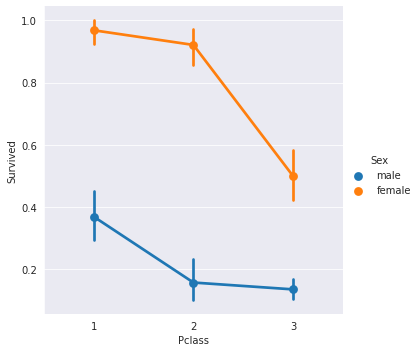

In [226]:
sns.factorplot('Pclass','Survived', hue = 'Sex', data = df_all)
plt.show()

**EDAD**

In [227]:
df_train['Age'].value_counts().to_frame().style.background_gradient(cmap = 'BuPu')

,Age
24.0,30
22.0,27
18.0,26
19.0,25
28.0,25
30.0,25
21.0,24
25.0,23
36.0,22
29.0,20


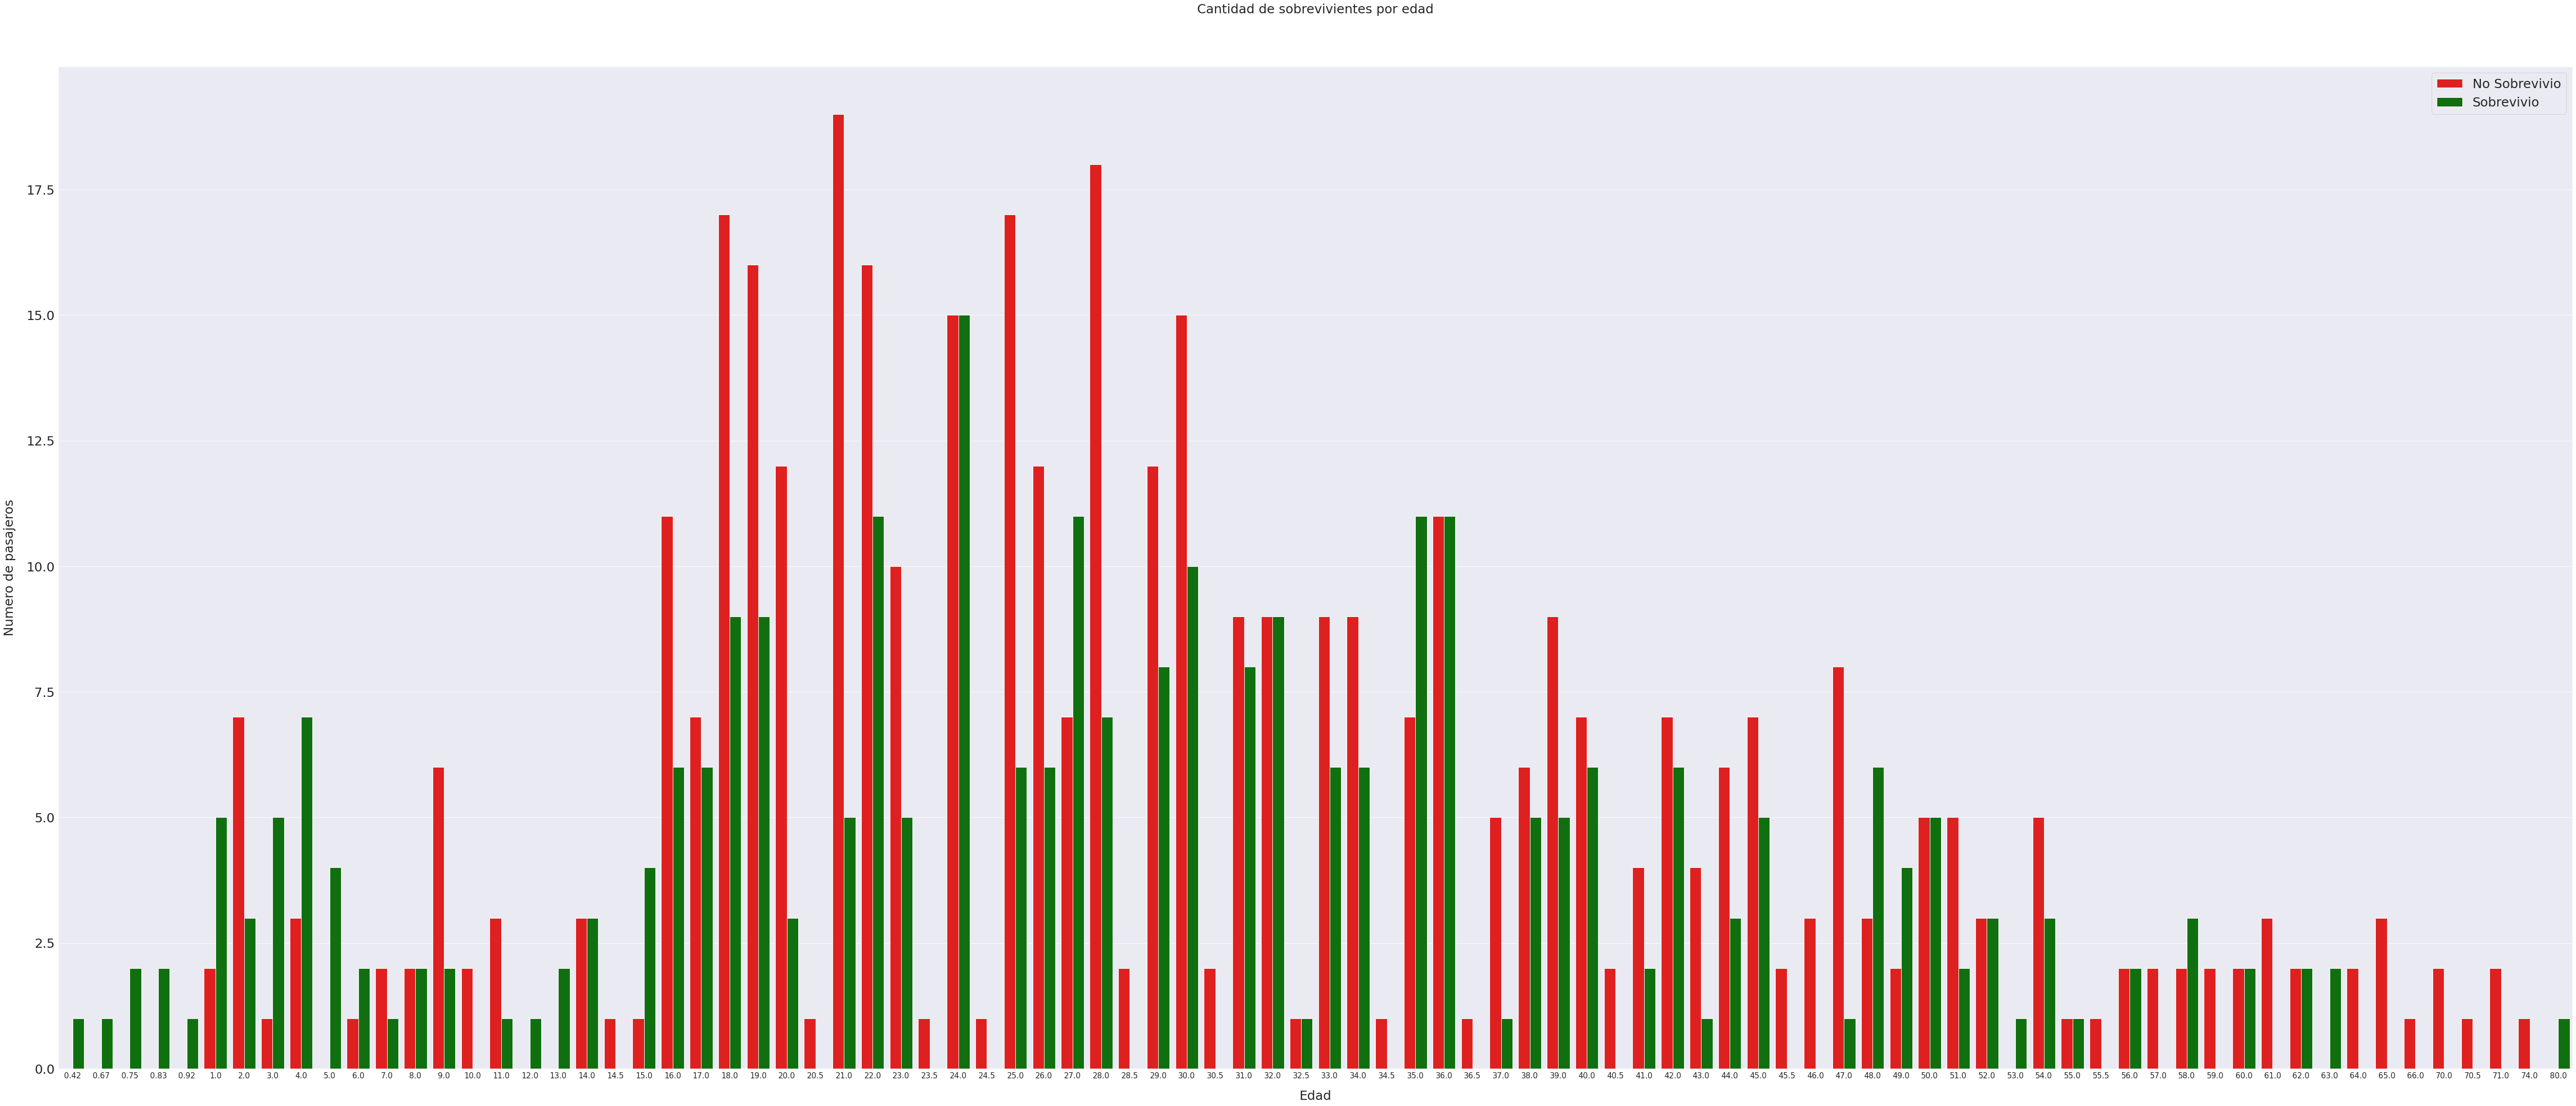

In [228]:
fig, axs = plt.subplots(figsize=(88, 36))

sns.countplot(x='Age', hue='Survived', data=df_train, palette=['red',"green"])

plt.xlabel('Edad', size=25, labelpad=20)
plt.ylabel('Numero de pasajeros', size=25, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=25)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 25})
plt.title('Cantidad de sobrevivientes por edad', size=25, y=1.05)

plt.show()

In [229]:
#df_all.loc[df_all['Age'] <= 15, 'Age']

**Agrupando la variables AGE en intervalos**

In [230]:
df_all['age_cat'] = 0
df_all.loc[df_all['Age'] <= 15, 'age_cat'] = 0
df_all.loc[(df_all['Age'] > 15) & (df_all['Age'] <= 30), 'age_cat'] = 1
df_all.loc[(df_all['Age'] > 30) & (df_all['Age'] <= 45), 'age_cat'] = 2
df_all.loc[(df_all['Age'] > 45) & (df_all['Age'] <= 60), 'age_cat'] = 3
df_all.loc[(df_all['Age'] > 60) & (df_all['Age'] <= 75), 'age_cat'] = 4
df_all.loc[df_all['Age'] > 75, 'age_cat'] = 5

df_train['age_cat'] = 0
df_train.loc[df_train['Age'] <= 15, 'age_cat'] = 0
df_train.loc[(df_train['Age'] > 15) & (df_train['Age'] <= 30), 'age_cat'] = 1
df_train.loc[(df_train['Age'] > 30) & (df_train['Age'] <= 45), 'age_cat'] = 2
df_train.loc[(df_train['Age'] > 45) & (df_train['Age'] <= 60), 'age_cat'] = 3
df_train.loc[(df_train['Age'] > 60) & (df_train['Age'] <= 75), 'age_cat'] = 4
df_train.loc[df_train['Age'] > 75, 'age_cat'] = 5

df_all.head(10)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,3
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,0


In [231]:
df_all['age_cat'].value_counts().to_frame().style.background_gradient(cmap = 'BuPu')

,age_cat
1,494
0,378
2,282
3,122
4,31
5,2


In [232]:
df_train['age_cat'].value_counts().to_frame().style.background_gradient(cmap = 'BuPu')

,age_cat
1,326
0,260
2,202
3,81
4,21
5,1


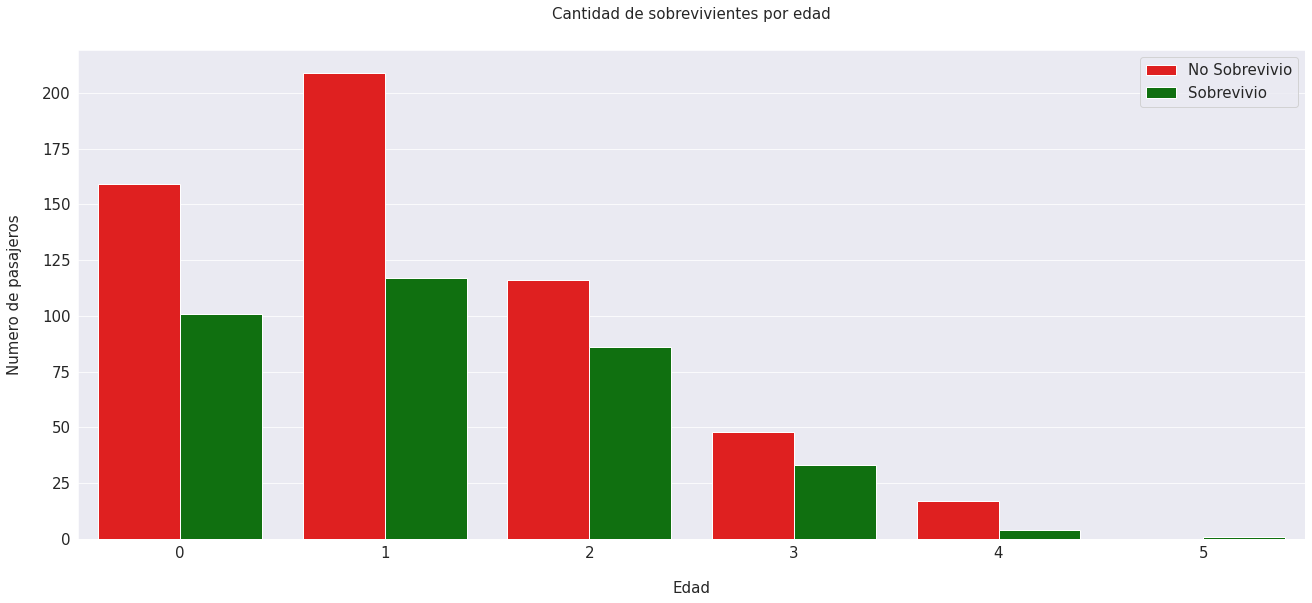

In [233]:
fig, axs = plt.subplots(figsize=(22, 9))

#sns.countplot(x='Age', hue='Survived', data=df_all, palette=['red',"green"])
sns.countplot(x='age_cat', hue='Survived', data=df_train, palette=['red',"green"])

plt.xlabel('Edad', size=15, labelpad=20)
plt.ylabel('Numero de pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Cantidad de sobrevivientes por edad', size=15, y=1.05)

plt.show()

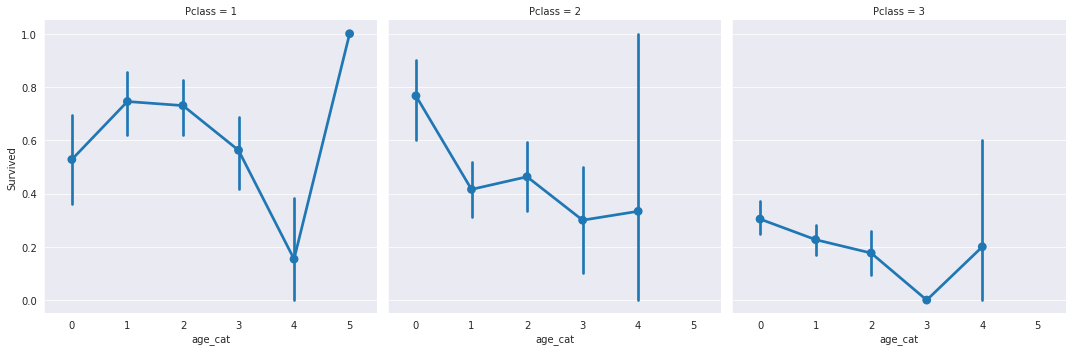

In [234]:
sns.factorplot('age_cat', 'Survived', data=df_train, col='Pclass')
plt.show()

**Fare**

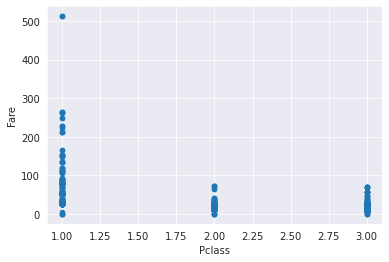

In [235]:
# diagrama de dispersión
disp= df_train.plot(kind='scatter', x='Pclass', y='Fare')

**Agrupando la variable FARE por intervalos**

In [236]:
df_all['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [237]:
df_all['fare_range'] = pd.qcut(df_all['Fare'], 13) # Cuantil que divide la distribucion en 13 partes
df_all.groupby(['fare_range'])['Survived'].mean().to_frame().style.background_gradient('summer_r')


,Survived
fare_range,
"(-0.001, 7.25]",0.132530
"(7.25, 7.75]",0.315789
"(7.75, 7.896]",0.180723
"(7.896, 8.05]",0.225806
"(8.05, 10.5]",0.230769
"(10.5, 13.0]",0.461538
"(13.0, 15.742]",0.326531
"(15.742, 23.25]",0.529412
"(23.25, 26.55]",0.467532


In [238]:
df_all['fare_range'].value_counts()

(7.75, 7.896]        127
(-0.001, 7.25]       117
(23.25, 26.55]       109
(8.05, 10.5]         108
(34.157, 56.496]     104
(15.742, 23.25]      101
(83.475, 512.329]    100
(56.496, 83.475]      98
(7.25, 7.75]          93
(10.5, 13.0]          92
(26.55, 34.157]       91
(7.896, 8.05]         84
(13.0, 15.742]        84
Name: fare_range, dtype: int64

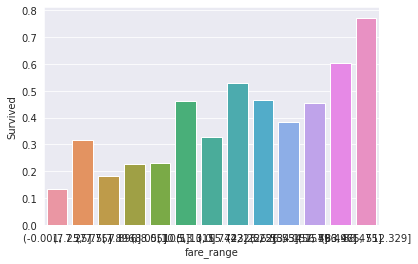

In [239]:
sns.barplot(data=df_all, x='fare_range', y='Survived', ci = None)
plt.show()

In [240]:
df_all['fare_cat'] = 0
df_all.loc[df_all['Fare'] <= 7.229, 'fare_cat'] = 0
df_all.loc[(df_all['Fare'] > 7.229) & (df_all['Fare'] <= 7.75), 'fare_cat'] = 1
df_all.loc[(df_all['Fare'] > 7.75) & (df_all['Fare'] <= 7.896), 'fare_cat'] = 2
df_all.loc[(df_all['Fare'] > 7.896) & (df_all['Fare'] <= 8.05), 'fare_cat'] = 3
df_all.loc[(df_all['Fare'] > 8.05) & (df_all['Fare'] <= 10.5), 'fare_cat'] = 4
df_all.loc[(df_all['Fare'] > 10.5) & (df_all['Fare'] <= 13.0), 'fare_cat'] = 5
df_all.loc[(df_all['Fare'] > 13.0) & (df_all['Fare'] <= 15.85), 'fare_cat'] = 6
df_all.loc[(df_all['Fare'] > 15.85) & (df_all['Fare'] <= 24.0), 'fare_cat'] = 7
df_all.loc[(df_all['Fare'] > 24.0) & (df_all['Fare'] <=  26.55), 'fare_cat'] = 8
df_all.loc[(df_all['Fare'] > 26.55) & (df_all['Fare'] <= 33.308), 'fare_cat'] = 9
df_all.loc[(df_all['Fare'] > 33.308) & (df_all['Fare'] <= 55.9), 'fare_cat'] = 10
df_all.loc[(df_all['Fare'] > 55.9) & (df_all['Fare'] <= 83.158), 'fare_cat'] = 11
df_all.loc[(df_all['Fare'] > 83.158) & (df_all['Fare'] <= 512.329), 'fare_cat'] = 12


#df_all.head(10)

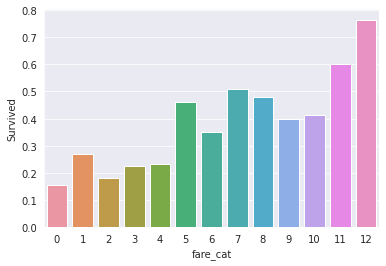

In [241]:
sns.barplot(data=df_all, x='fare_cat', y='Survived', ci = None)
plt.show()

In [242]:
tar12 = df_all.loc[df_all['fare_cat'] == 12]
tar12 = tar12[['Fare', 'fare_cat','Survived']]
print(tar12)

          Fare  fare_cat  Survived
27    263.0000        12       0.0
31    146.5208        12       1.0
62     83.4750        12       0.0
88    263.0000        12       1.0
118   247.5208        12       0.0
...        ...       ...       ...
1281   93.5000        12       NaN
1291  164.8667        12       NaN
1298  211.5000        12       NaN
1302   90.0000        12       NaN
1305  108.9000        12       NaN

[104 rows x 3 columns]


In [243]:
tar12.describe()

,Fare,fare_cat,Survived
count,104.000000,104.0,68.000000
mean,157.004686,12.0,0.764706
std,61.876426,0.0,0.427336
min,83.158300,12.0,0.000000
25%,106.425000,12.0,1.000000
50%,136.206250,12.0,1.000000
75%,211.500000,12.0,1.000000
max,263.000000,12.0,1.000000


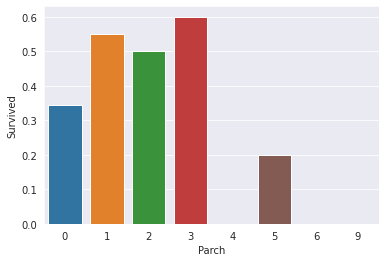

In [244]:
sns.barplot(data=df_all, x='Parch', y='Survived', ci = None)
plt.show()

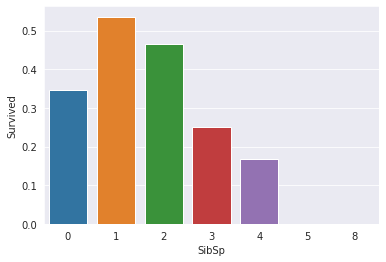

In [245]:
sns.barplot(data=df_all, x='SibSp', y='Survived', ci = None)
plt.show()

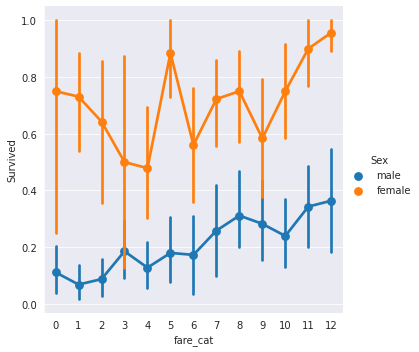

In [246]:
sns.factorplot('fare_cat', 'Survived', data=df_all, hue='Sex')
plt.show()

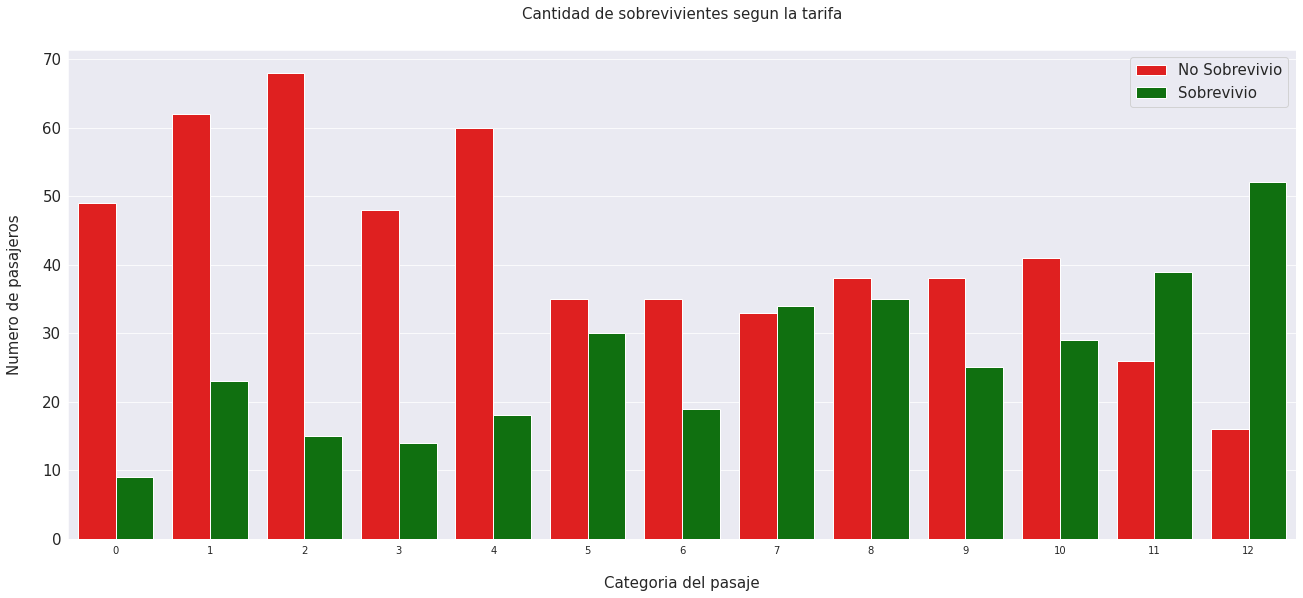

In [247]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='fare_cat', hue='Survived', data=df_all, palette=['red',"green"])

plt.xlabel('Categoria del pasaje', size=15, labelpad=20)
plt.ylabel('Numero de pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Cantidad de sobrevivientes segun la tarifa', size=15, y=1.05)

plt.show()

In [248]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,"(-0.001, 7.25]",1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,"(56.496, 83.475]",11
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,"(7.896, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,"(34.157, 56.496]",10
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,"(7.896, 8.05]",3


**II MISSING VALUES**

Es conveniente trabajar en conjuntos de prueba y entrenamiento concatenados mientras se trabaja con valores faltantes; de lo contrario, los datos completos pueden sobreajustarse a las muestras del conjunto de prueba o entrenamiento.

In [249]:
total_datos_perdidos = df_all.isnull().sum().sort_values(ascending=False)
#print(total_datos_perdidos)
porc_perdidos = (df_all.isnull().sum()/df_all.isnull().count())*100
#print(porc_perdidos)
round_porc_perdidos = (round(porc_perdidos, 2)).sort_values(ascending=False)
#print(round_porc_perdidos)
datos_perdidos = pd.concat([total_datos_perdidos, porc_perdidos], axis=1, keys=['Datos Perdidos','Porcentaje de Datos Perdidos'])
datos_perdidos.head()

,Datos Perdidos,Porcentaje de Datos Perdidos
Cabin,1014,77.463713
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


In [250]:
df_all.isnull().mean()  #Porque usamos mean?

Age            0.200917
Cabin          0.774637
Embarked       0.001528
Fare           0.000764
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Survived       0.319328
Ticket         0.000000
age_cat        0.000000
fare_range     0.000764
fare_cat       0.000000
dtype: float64

In [251]:
#print(df_train.info())
df_all.sample(100)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
681,27.0,D49,C,76.7292,"Hassab, Mr. Hammad",0,682,1,male,0,1.0,PC 17572,1,"(56.496, 83.475]",11
1072,37.0,E52,C,83.1583,"Compton, Mr. Alexander Taylor Jr",1,1073,1,male,1,NaN,PC 17756,2,"(56.496, 83.475]",12
10,4.0,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549,0,"(15.742, 23.25]",7
770,24.0,NaN,S,9.5000,"Lievens, Mr. Rene Aime",0,771,3,male,0,0.0,345781,1,"(8.05, 10.5]",4
541,9.0,NaN,S,31.2750,"Andersson, Miss. Ingeborg Constanzia",2,542,3,female,4,0.0,347082,0,"(26.55, 34.157]",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,36.0,E25,S,26.2875,"McGough, Mr. James Robert",0,513,1,male,0,1.0,PC 17473,2,"(23.25, 26.55]",8
143,19.0,NaN,Q,6.7500,"Burke, Mr. Jeremiah",0,144,3,male,0,0.0,365222,1,"(-0.001, 7.25]",0
115,21.0,NaN,S,7.9250,"Pekoniemi, Mr. Edvard",0,116,3,male,0,0.0,STON/O 2. 3101294,1,"(7.896, 8.05]",3
956,NaN,NaN,S,21.0000,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",0,957,2,female,0,NaN,F.C.C. 13534,0,"(15.742, 23.25]",7


In [252]:
df_test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [253]:
#print(df_test.info())
df_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
335,1227,1,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.0000,C106,S
323,1215,1,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S
390,1282,1,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.5000,B24,S
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C
239,1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
393,1285,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S
294,1186,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S


In [254]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('Columna {} valores perdidos: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Conjunto de entrenamiento
Columna PassengerId valores perdidos: 0
Columna Survived valores perdidos: 0
Columna Pclass valores perdidos: 0
Columna Name valores perdidos: 0
Columna Sex valores perdidos: 0
Columna Age valores perdidos: 177
Columna SibSp valores perdidos: 0
Columna Parch valores perdidos: 0
Columna Ticket valores perdidos: 0
Columna Fare valores perdidos: 0
Columna Cabin valores perdidos: 687
Columna Embarked valores perdidos: 2
Columna age_cat valores perdidos: 0


Conjunto de prueba
Columna PassengerId valores perdidos: 0
Columna Pclass valores perdidos: 0
Columna Name valores perdidos: 0
Columna Sex valores perdidos: 0
Columna Age valores perdidos: 86
Columna SibSp valores perdidos: 0
Columna Parch valores perdidos: 0
Columna Ticket valores perdidos: 0
Columna Fare valores perdidos: 1
Columna Cabin valores perdidos: 327
Columna Embarked valores perdidos: 0




**AGE**

No es conveniente eliminar la edad pues debemos saber si impacto en la sobrevivencia de los pasajeros. Veremos de imputar un valor en los datos faltantes. Lo primero que se nos ocurrira es llenar las edades faltantes con la mediana de la edad de todos los datos.

In [255]:
df_all_corr = df_all.corr().abs().unstack()
df_all_corr = df_all_corr.sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: 'Coeficiente de Correlacion'}, inplace=True)
#df_all_corr
df_all_corr[df_all_corr['Variable 1'] == 'Age']

,Variable 1,Variable 2,Coeficiente de Correlacion
0,Age,Age,1.000000
10,Age,age_cat,0.954068
19,Age,Pclass,0.408106
33,Age,SibSp,0.243699
41,Age,Fare,0.178740
45,Age,fare_cat,0.158708
48,Age,Parch,0.150917
54,Age,Survived,0.077221
68,Age,PassengerId,0.028814


Del cuadro anterior vemos una cierta correlacion entre la edad y la Pclass

In [256]:
df_all_corr = df_all.corr().abs().unstack()
df_all_corr = df_all_corr.sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: 'Coeficiente de Correlacion'}, inplace=True)
#df_all_corr
df_all_corr[df_all_corr['Variable 1'] == 'Pclass']

,Variable 1,Variable 2,Coeficiente de Correlacion
7,Pclass,Pclass,1.000000
12,Pclass,fare_cat,0.700462
14,Pclass,Fare,0.558629
18,Pclass,age_cat,0.412328
20,Pclass,Age,0.408106
27,Pclass,Survived,0.338481
56,Pclass,SibSp,0.060832
62,Pclass,PassengerId,0.038354
71,Pclass,Parch,0.018322


Aqui vemos una cierta correlacion entre la Pclass y la tarifa, edad y supervivencia.

Como se ve a continuación, los grupos Pclass y Sex tienen valores de mediana de edad distintos. Conforme aumenta la clase de pasajeros, también aumenta la mediana de la edad tanto para hombres como para mujeres. Sin embargo, las mujeres tienden a tener una mediana de edad ligeramente más baja que los hombres. 

In [257]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass'])
age_by_pclass_sex = age_by_pclass_sex.median()['Age']

#print(age_by_pclass_sex)
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Edad Mediana de Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

print('Edad mediana de todos los pasajeros: {}'.format(df_all['Age'].median()))



Edad Mediana de Pclass 1 females: 36.0
Edad Mediana de Pclass 1 males: 42.0
Edad Mediana de Pclass 2 females: 28.0
Edad Mediana de Pclass 2 males: 29.5
Edad Mediana de Pclass 3 females: 22.0
Edad Mediana de Pclass 3 males: 25.0
Edad mediana de todos los pasajeros: 28.0


Las edades medianas a continuación se utilizan para completar los valores faltantes en la función Edad.

In [258]:
# Llenamos los valores perdidos de Age con la mediana del agrupamiento por Sex y Pclass
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())) # lambda x es una funcion anonima, ie no tiene nombre definido y ejecuta las instrucciones despues de los dos puntos : 

In [259]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,"(-0.001, 7.25]",1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,"(56.496, 83.475]",11
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,"(7.896, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,"(34.157, 56.496]",10
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,"(7.896, 8.05]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,0,"(7.896, 8.05]",3
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,2,"(83.475, 512.329]",12
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,2,"(-0.001, 7.25]",1
1307,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,0,"(7.896, 8.05]",3


**PUERTO DE EMBARQUE**

In [260]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,2,"(56.496, 83.475]",11
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,4,"(56.496, 83.475]",11


In [261]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

**FARE**

Podemos asumir intutitivamente que la tarifa está relacionada con el tamaño de la familia (Parch y SibSp) y las variable Pclass. El valor de la mediana para un hombre con un boleto de tercera clase y sin familia es una opción lógica para llenar el valor faltante.

In [262]:
df_all_corr = df_all.corr().abs().unstack()
df_all_corr = df_all_corr.sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: 'Coeficiente de Correlacion'}, inplace=True)
#df_all_corr
df_all_corr[df_all_corr['Variable 1'] == 'Fare']

,Variable 1,Variable 2,Coeficiente de Correlacion
1,Fare,Fare,1.000000
13,Fare,Pclass,0.558629
16,Fare,fare_cat,0.551083
31,Fare,Survived,0.257307
35,Fare,Parch,0.221539
37,Fare,age_cat,0.213095
42,Fare,Age,0.200039
46,Fare,SibSp,0.160238
65,Fare,PassengerId,0.031428


In [263]:
print('Pasaje minimo: ', df_all['Fare'].min())
print('Pasaje maximo: ', df_all['Fare'].max())

Pasaje minimo:  0.0
Pasaje maximo:  512.3292


In [264]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,4,NaN,0


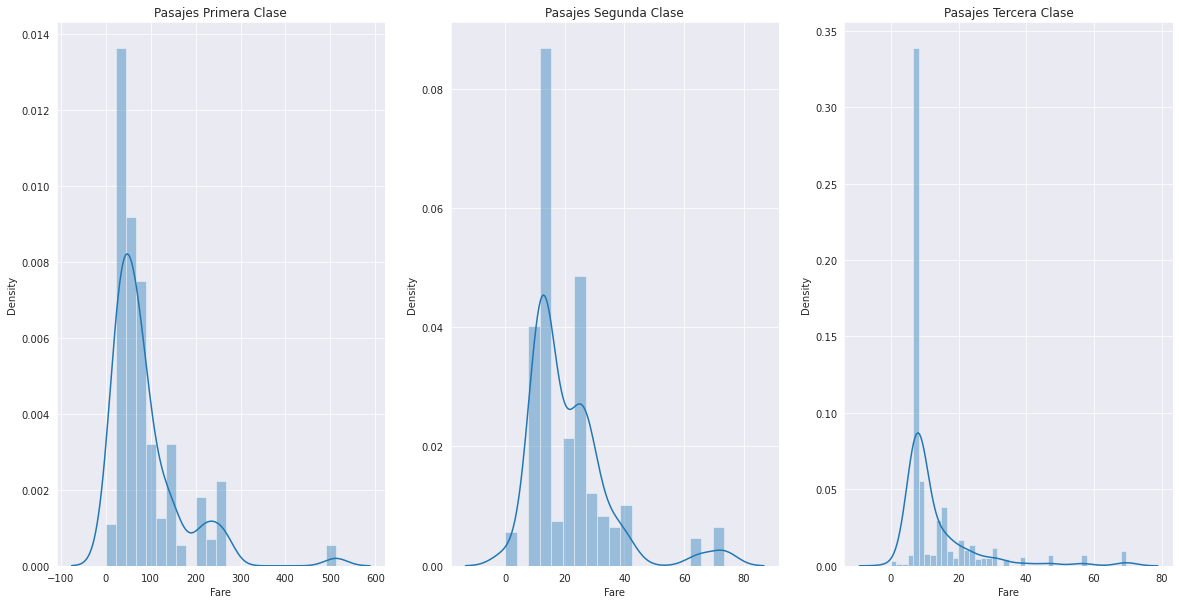

In [265]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10))
sns.distplot(df_all[df_all['Pclass'] == 1]['Fare'], ax = axs[0])
axs[0].set_title('Pasajes Primera Clase')
sns.distplot(df_all[df_all['Pclass'] == 2]['Fare'], ax = axs[1])
axs[1].set_title('Pasajes Segunda Clase')
sns.distplot(df_all[df_all['Pclass'] == 3]['Fare'], ax = axs[2])
axs[2].set_title('Pasajes Tercera Clase')
plt.show()

In [266]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()
print('Mediana de la Tarifa: ')
print(med_fare)
med_fare = med_fare[3][0][0]
print(med_fare)
# Llenamos el valor perdido con la mediana de la tarifa de un pasajero que viaja solo en tercera clase
df_all['Fare'] = df_all['Fare'].fillna(med_fare)
df_all['fare_cat'] = df_all['fare_cat'].fillna(2)

df_train['Fare'] = df_train['Fare'].fillna(med_fare)
df_train['fare_cat'] = df_all['fare_cat'].fillna(2)

df_test['Fare'] = df_test['Fare'].fillna(med_fare)
df_test['fare_cat'] = df_all['fare_cat'].fillna(2)

Mediana de la Tarifa: 
Pclass  Parch  SibSp
1       0      0         31.33960
               1         75.25000
               2         51.47920
        1      0         63.35830
               1         83.15830
        2      0         83.15830
               1        120.00000
               2        262.37500
               3        263.00000
        3      1        262.37500
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         73.50000
               3         21.00000
        1      0         23.00000
               1         26.25000
               2         33.00000
        2      0         26.25000
               1         41.57920
        3      0         39.00000
               1         23.00000
               2         18.75000
3       0      0          7.85420
               1         14.45625
               2         19.83960
               3         16.92500
        1      0         12.47500
    

In [267]:
#df_all.drop(['Age', 'Fare', 'Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [268]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,"(-0.001, 7.25]",1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,"(56.496, 83.475]",11
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,"(7.896, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,"(34.157, 56.496]",10
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,"(7.896, 8.05]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,0,"(7.896, 8.05]",3
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,2,"(83.475, 512.329]",12
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,2,"(-0.001, 7.25]",1
1307,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,0,"(7.896, 8.05]",3


Sexo y Embarque se deben pasar a numerico

In [269]:
#df_all['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
#df_all['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

In [270]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,"(-0.001, 7.25]",1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,"(56.496, 83.475]",11
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,"(7.896, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,"(34.157, 56.496]",10
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,"(7.896, 8.05]",3


**Cabina**
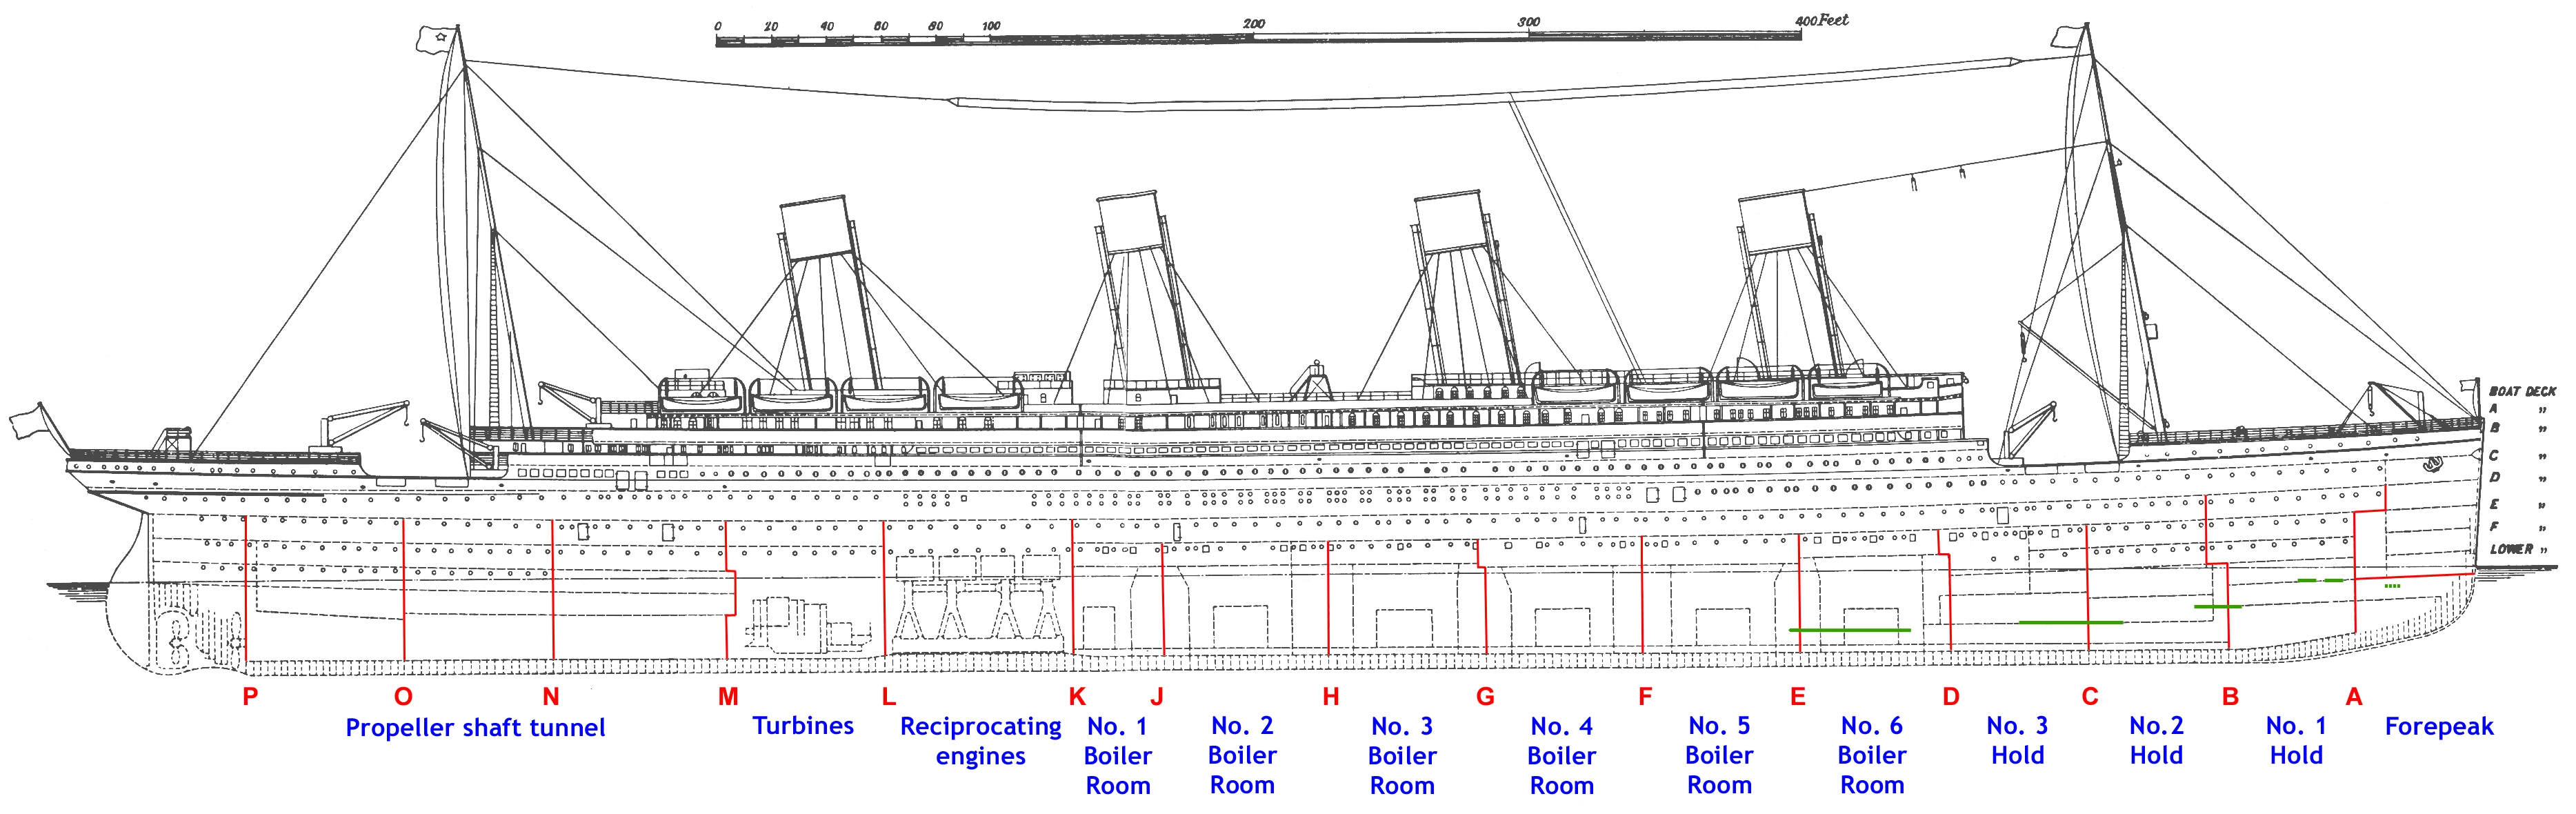

En la cubierta de botes había 6 habitaciones etiquetadas como T, U, W, X, Y, Z pero solo la cabina T está presente en el conjunto de datos.

Las cubiertas A, B y C eran solo para pasajeros de 1ra clase

Las cubiertas D y E eran para todas las clases.

Las cubiertas F y G eran para pasajeros de segunda y tercera clase.

Para ir de A a G, la distancia a la escalera aumenta, lo que podría ser un factor de supervivencia.

            0          1           2
A  100.000000   0.000000    0.000000
B  100.000000   0.000000    0.000000
C  100.000000   0.000000    0.000000
D   86.956522  13.043478    0.000000
E   82.926829   9.756098    7.317073
F    0.000000  61.904762   38.095238
G    0.000000   0.000000  100.000000
M    6.607495  25.049310   68.343195
T  100.000000   0.000000    0.000000


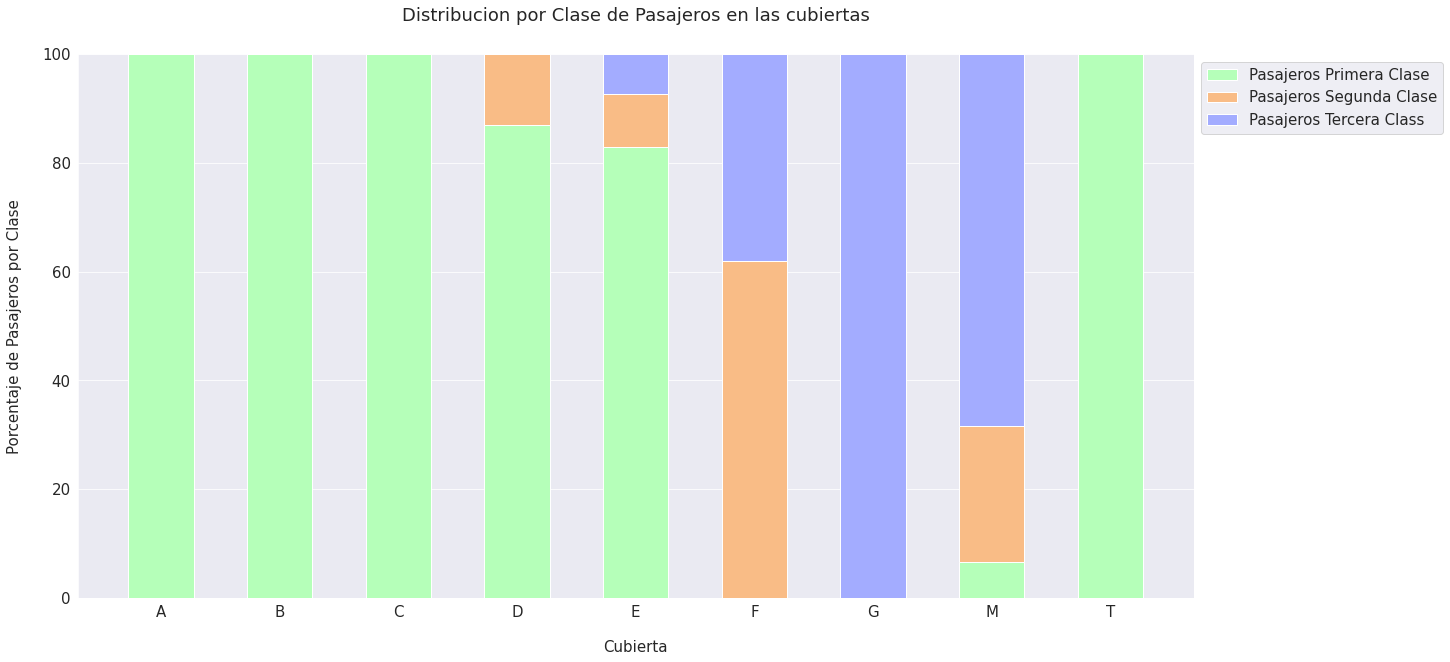

In [271]:
# Creamos el campo 'Cubierta/Deck'con la primera letra del campo 'Cabin' (M significa Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
                                                                        
def get_pclass_dist(df):
    
    # Creamos un diccionario para el total de pasajeros por clase en cada cubierta
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)   
    deck_percentages = {}

    # Creamos un diccionario para el porcentaje de pasajeros por clase en cada cubierta
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    #print(percentages)
    df_percentages = pd.DataFrame(percentages).transpose()
    print(df_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.55
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Pasajeros Primera Clase')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Pasajeros Segunda Clase')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Pasajeros Tercera Class')

    plt.xlabel('Cubierta', size=15, labelpad=20)
    plt.ylabel('Porcentaje de Pasajeros por Clase', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Distribucion por Clase de Pasajeros en las cubiertas', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)

display_pclass_dist(all_deck_per)

In [272]:
# Pasajero en la cubierta T se cambia a A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

           0          1
A  56.250000  43.750000
B  25.531915  74.468085
C  40.677966  59.322034
D  24.242424  75.757576
E  25.000000  75.000000
F  38.461538  61.538462
G  50.000000  50.000000
M  70.014556  29.985444


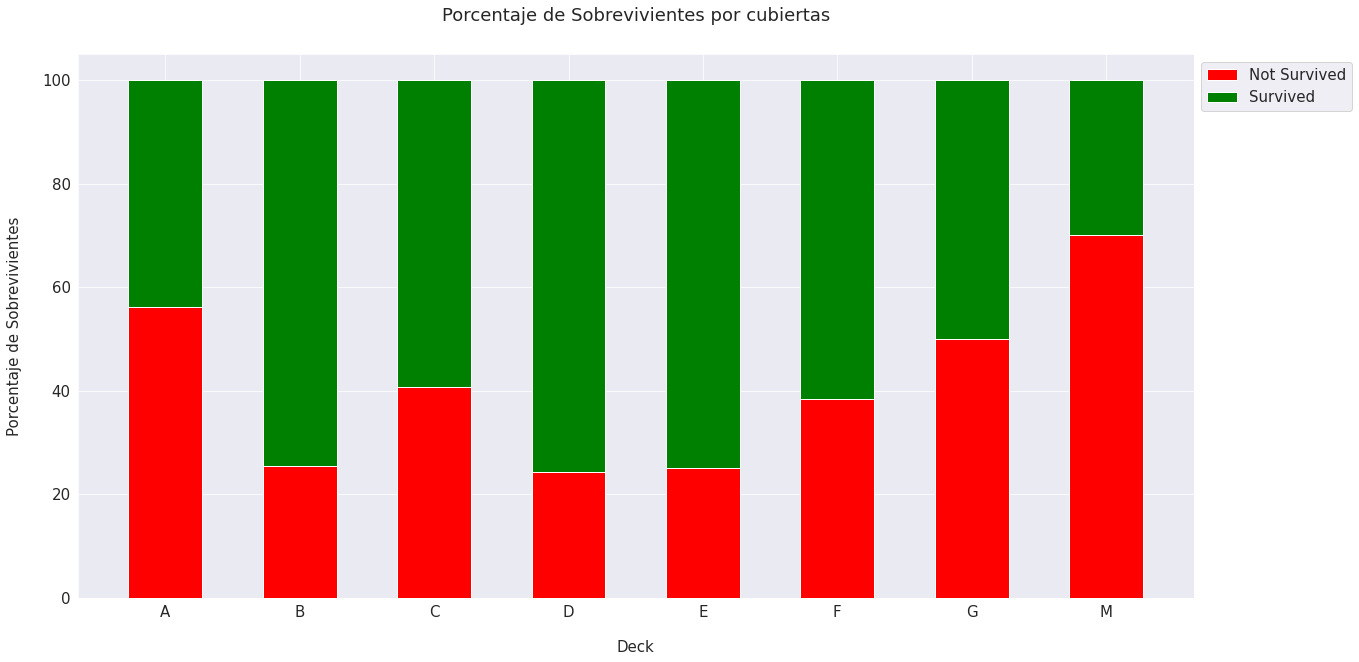

In [273]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creamos un diccionario para cada sobreviviente contado en cada cubierta
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    print(df_survived_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.55    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='red', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='green', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Porcentaje de Sobrevivientes', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Porcentaje de Sobrevivientes por cubiertas', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

Podemos ver que cada cubierta tiene diferente cantidad de sobrevivientes.
Las cubiertas A, B y C están etiquetadas como ABC porque todas ellas solo tienen pasajeros de primera clase.
Las cubiertas D y E están etiquetadas como DE porque ambas tienen una distribución de clase de pasajeros similar y la misma tasa de supervivencia.
Las cubiertas F y G están etiquetados como FG por la misma razón anterior
La cubierta M no necesita agruparse con otros grupos porque es muy diferente de los demás y tiene la tasa de supervivencia más baja.

In [274]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()


M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [275]:
# Desechamos la variable cabina pues usamos la nueva variable Deck

df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    display_missing(df)

Columna Age valores perdidos: 0
Columna Embarked valores perdidos: 0
Columna Fare valores perdidos: 0
Columna Name valores perdidos: 0
Columna Parch valores perdidos: 0
Columna PassengerId valores perdidos: 0
Columna Pclass valores perdidos: 0
Columna Sex valores perdidos: 0
Columna SibSp valores perdidos: 0
Columna Survived valores perdidos: 0
Columna Ticket valores perdidos: 0
Columna age_cat valores perdidos: 0
Columna fare_range valores perdidos: 0
Columna fare_cat valores perdidos: 0
Columna Deck valores perdidos: 0


Columna Age valores perdidos: 0
Columna Embarked valores perdidos: 0
Columna Fare valores perdidos: 0
Columna Name valores perdidos: 0
Columna Parch valores perdidos: 0
Columna PassengerId valores perdidos: 0
Columna Pclass valores perdidos: 0
Columna Sex valores perdidos: 0
Columna SibSp valores perdidos: 0
Columna Ticket valores perdidos: 0
Columna age_cat valores perdidos: 0
Columna fare_range valores perdidos: 1
Columna fare_cat valores perdidos: 0
Columna Deck v

Distribucion de los Sobrevivientes (Target):

342 de 891 pasajeros sobrevivieron y eso es el 38.38% del conjunto de entrenamiento.
549 de 891 pasajeros no sobrevivieron y eso es el 61.62%  del conjunto de entrenamiento.


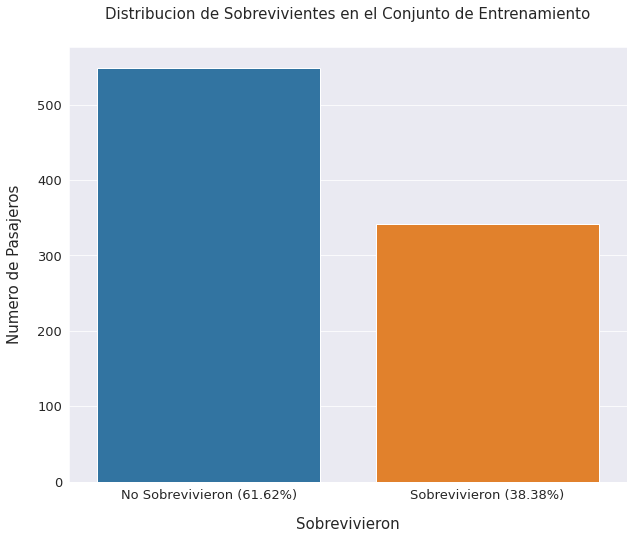

In [276]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

print('{} de {} pasajeros sobrevivieron y eso es el {:.2f}% del conjunto de entrenamiento.'.format(survived, df_train.shape[0], survived_per))
print('{} de {} pasajeros no sobrevivieron y eso es el {:.2f}%  del conjunto de entrenamiento.'.format(not_survived, df_train.shape[0], not_survived_per))

plt.figure(figsize=(10, 8))
sns.countplot(df_train['Survived'])

plt.xlabel('Sobrevivieron', size=15, labelpad=15)
plt.ylabel('Numero de Pasajeros', size=15, labelpad=15)
plt.xticks((0, 1), ['No Sobrevivieron ({0:.2f}%)'.format(not_survived_per), 'Sobrevivieron ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Distribucion de Sobrevivientes en el Conjunto de Entrenamiento', size=15, y=1.05)

plt.show()

**Correlaciones:**

Las características están correlacionadas entre sí y dependen unas de otras. La correlación más alta entre características es 0.549500 en el conjunto de entrenamiento y 0.577147 en el conjunto de prueba (entre Tarifa y Pclass). Las otras características también están correlacionadas. Hay 10 correlaciones en el conjunto de entrenamiento y 6 correlaciones en el conjunto de prueba que son superiores a 0,1.

In [277]:
df_all.shape

(1309, 15)

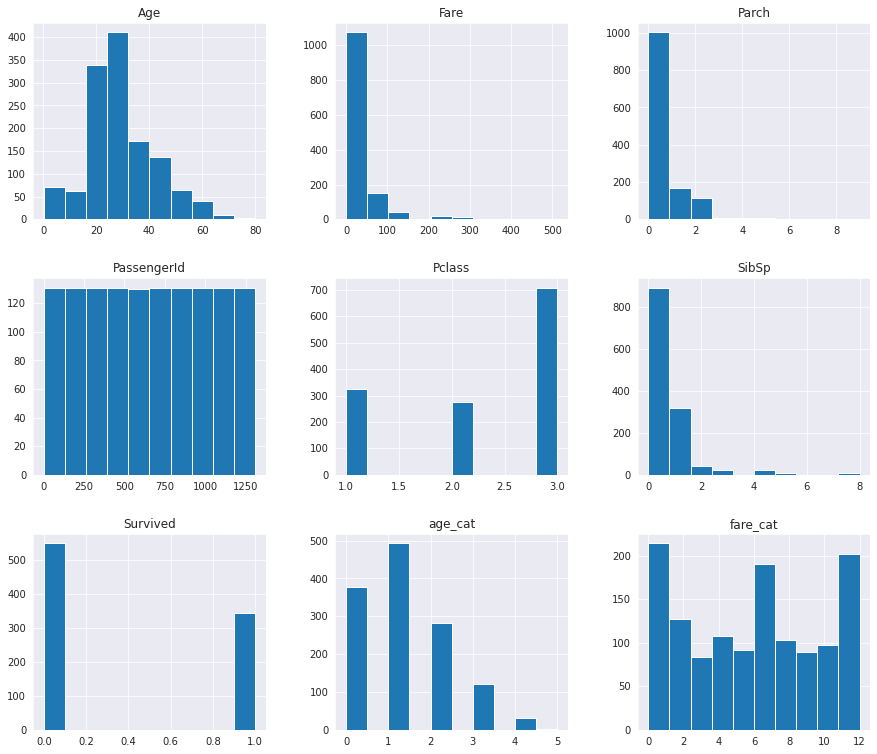

In [278]:
df_all.hist(figsize=(15,13))
plt.show()

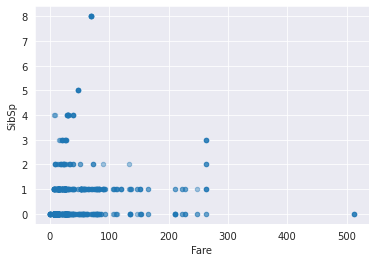

In [279]:
df_all.plot(x="Fare", y="SibSp", kind="scatter", alpha=0.4)
plt.show()

In [280]:
df_train_corr = df_train.drop(['PassengerId'], axis=1).corr(method='pearson').abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Coeficiente Correlacion'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Coeficiente Correlacion'] == 1.0].index)

df_test_corr = df_test.corr(method='pearson').abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Coeficiente Correlacion'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Coeficiente Correlacion'] == 1.0].index)

In [281]:
# Conjunto de entrenamiento - correlaciones altas
corr = df_train_corr_nd['Coeficiente Correlacion'] > 0.1
df_train_corr_nd[corr]


,Feature 1,Feature 2,Coeficiente Correlacion
8,Age,age_cat,0.807025
10,Pclass,fare_cat,0.676565
12,Fare,Pclass,0.549500
14,Fare,fare_cat,0.531657
16,Age,Pclass,0.417667
18,Parch,SibSp,0.414838
20,Parch,fare_cat,0.372559
22,SibSp,fare_cat,0.372234
24,age_cat,Pclass,0.371435
26,Survived,Pclass,0.338481


In [282]:
# Conjunto de prueba - correlaciones altas
corr = df_test_corr_nd['Coeficiente Correlacion'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Coeficiente Correlacion
8,Age,age_cat,0.832014
10,fare_cat,Pclass,0.751139
12,fare_cat,Fare,0.590289
14,Fare,Pclass,0.577489
16,Age,Pclass,0.526789
18,Pclass,age_cat,0.499127
20,Fare,age_cat,0.353389
22,age_cat,fare_cat,0.350130
24,Age,Fare,0.345347
26,SibSp,fare_cat,0.343918


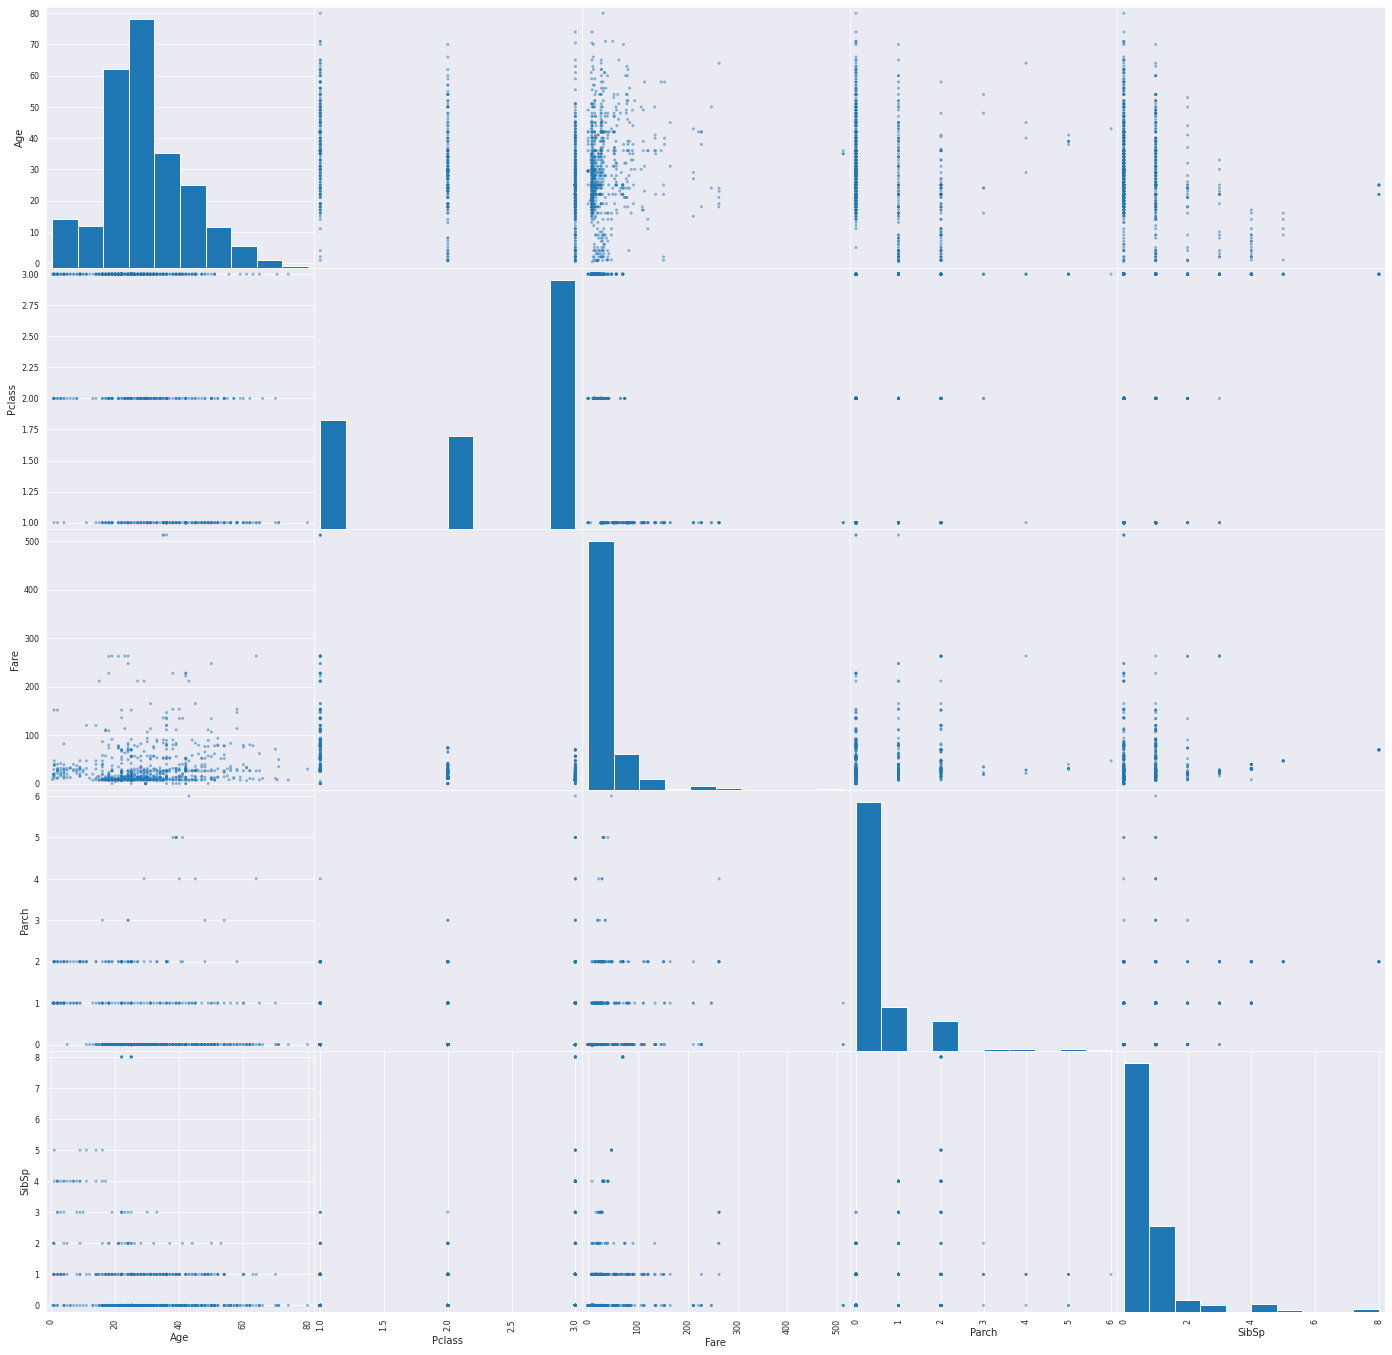

In [283]:
from pandas.plotting import scatter_matrix
#attributes = ["Age","Pclass","Fare","Sex","Survived"]
attributes = ["Age","Pclass","Fare","Parch","SibSp"]
scatter_matrix(df_train[attributes], figsize=(24,24))
plt.show()

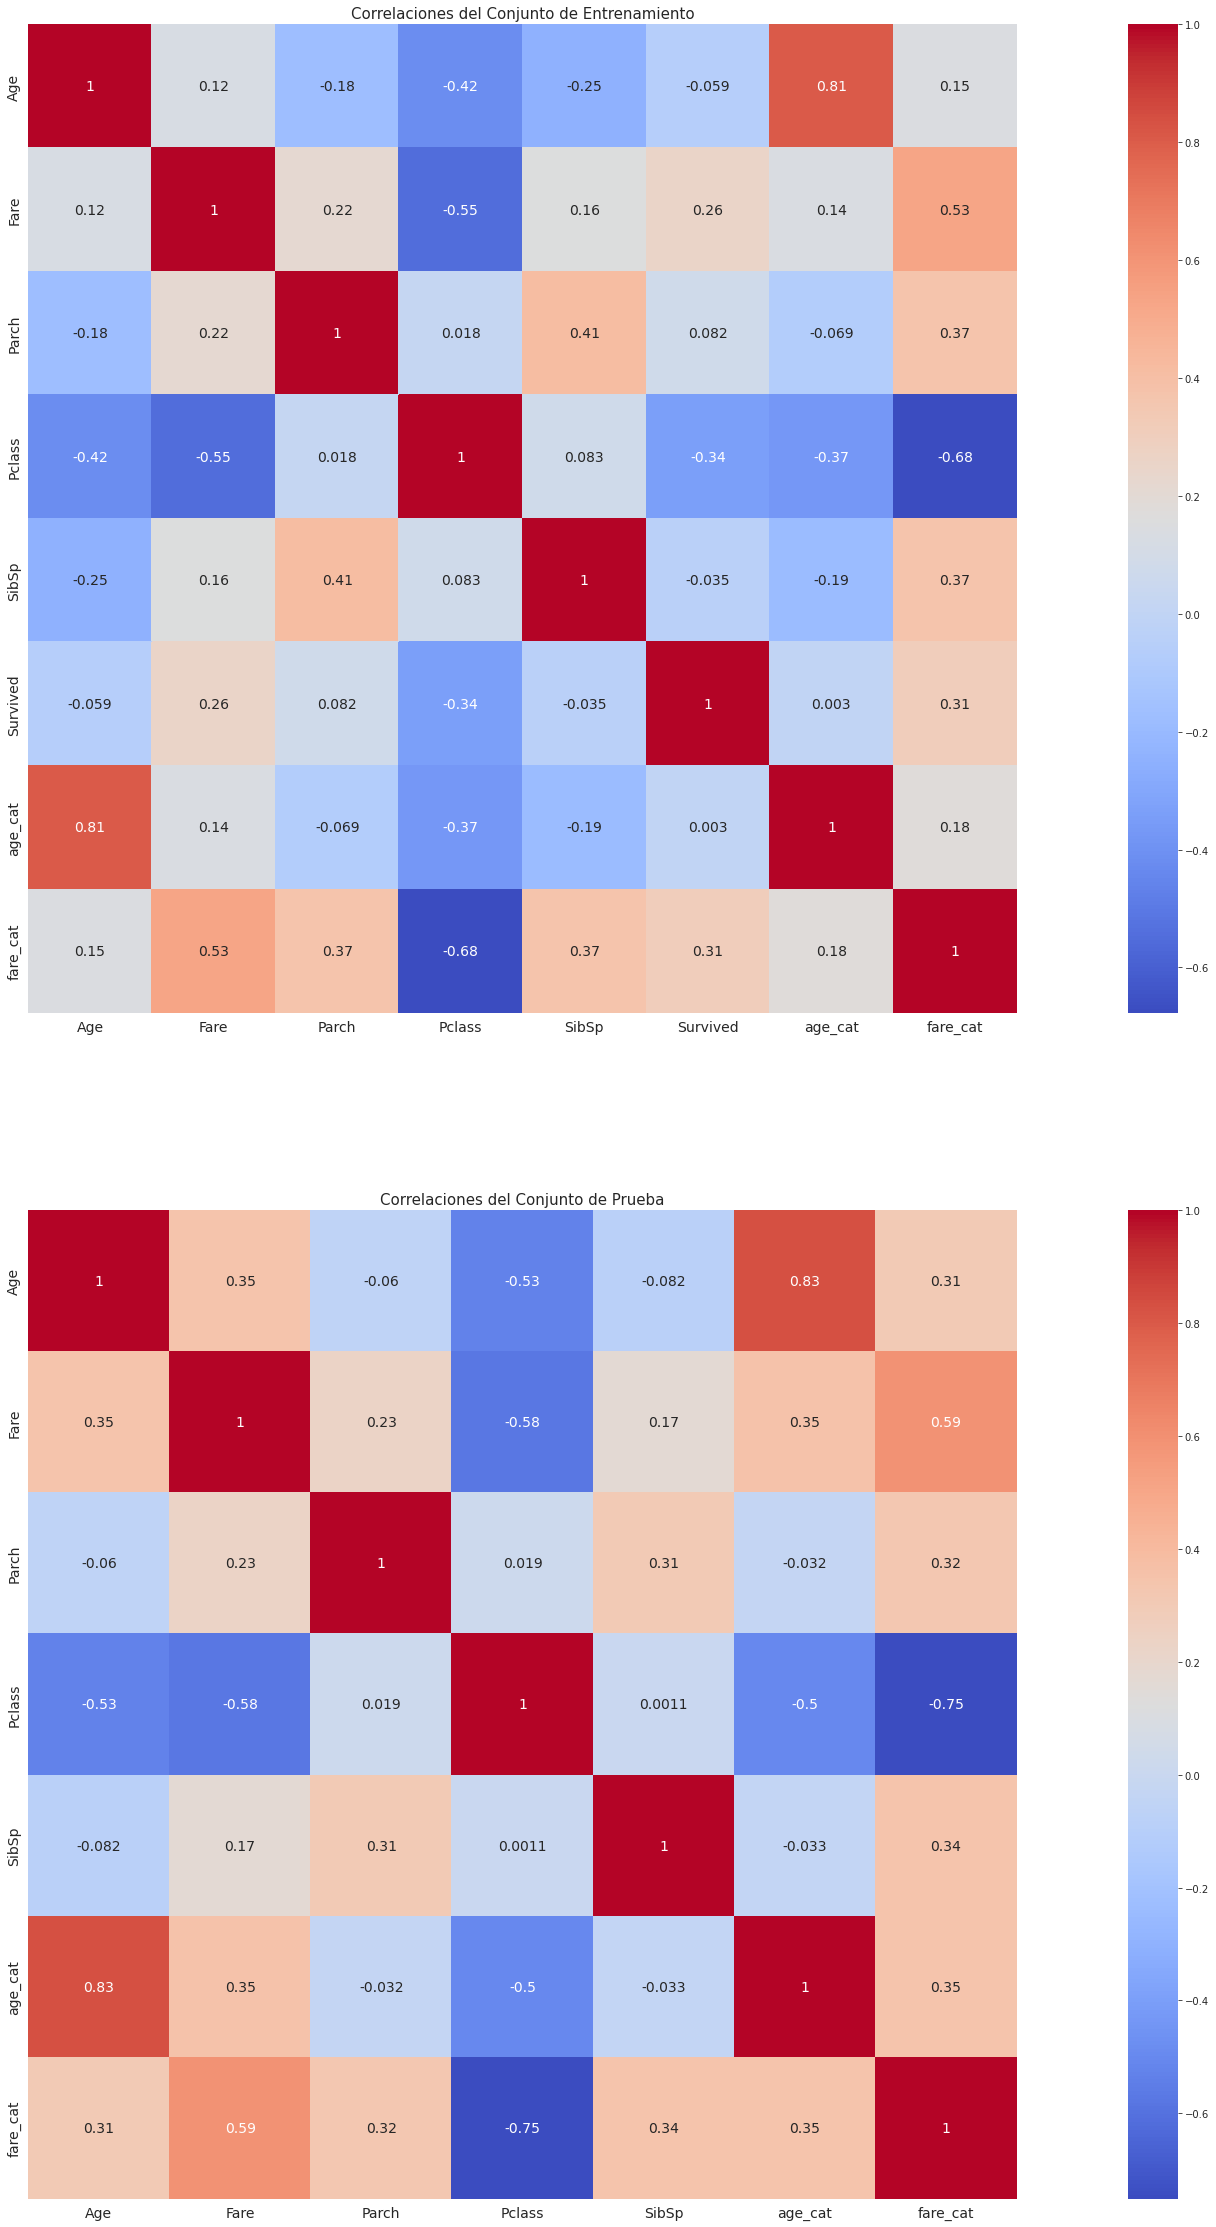

In [284]:
fig, axs = plt.subplots(nrows=2, figsize=(40, 40))

sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Correlaciones del Conjunto de Entrenamiento', size=15)
axs[1].set_title('Correlaciones del Conjunto de Prueba', size=15)

plt.show()

**DISTRIBUCION VARIABLE OBJETIVO POR FEATURES:** 



**Variables continuas**

Las variables continuas (Edad y Tarifa) tienen buenos puntos de división y picos para que aprenda un árbol de decisión. Un problema potencial para ambas funciones es que la distribución tiene más picos y baches en el conjunto de entrenamiento, pero es más suave en el conjunto de prueba. Es posible que el modelo no pueda generalizar al conjunto de pruebas por este motivo.

La distribución de la variable edad muestra claramente que los niños menores de 15 años tienen una tasa de supervivencia más alta que cualquiera de los otros grupos de edad.

En la función de distribución de tarifas, la tasa de supervivencia es mayor en las colas de distribución. La distribución también tiene un sesgo positivo debido a los valores atípicos extremadamente grandes.

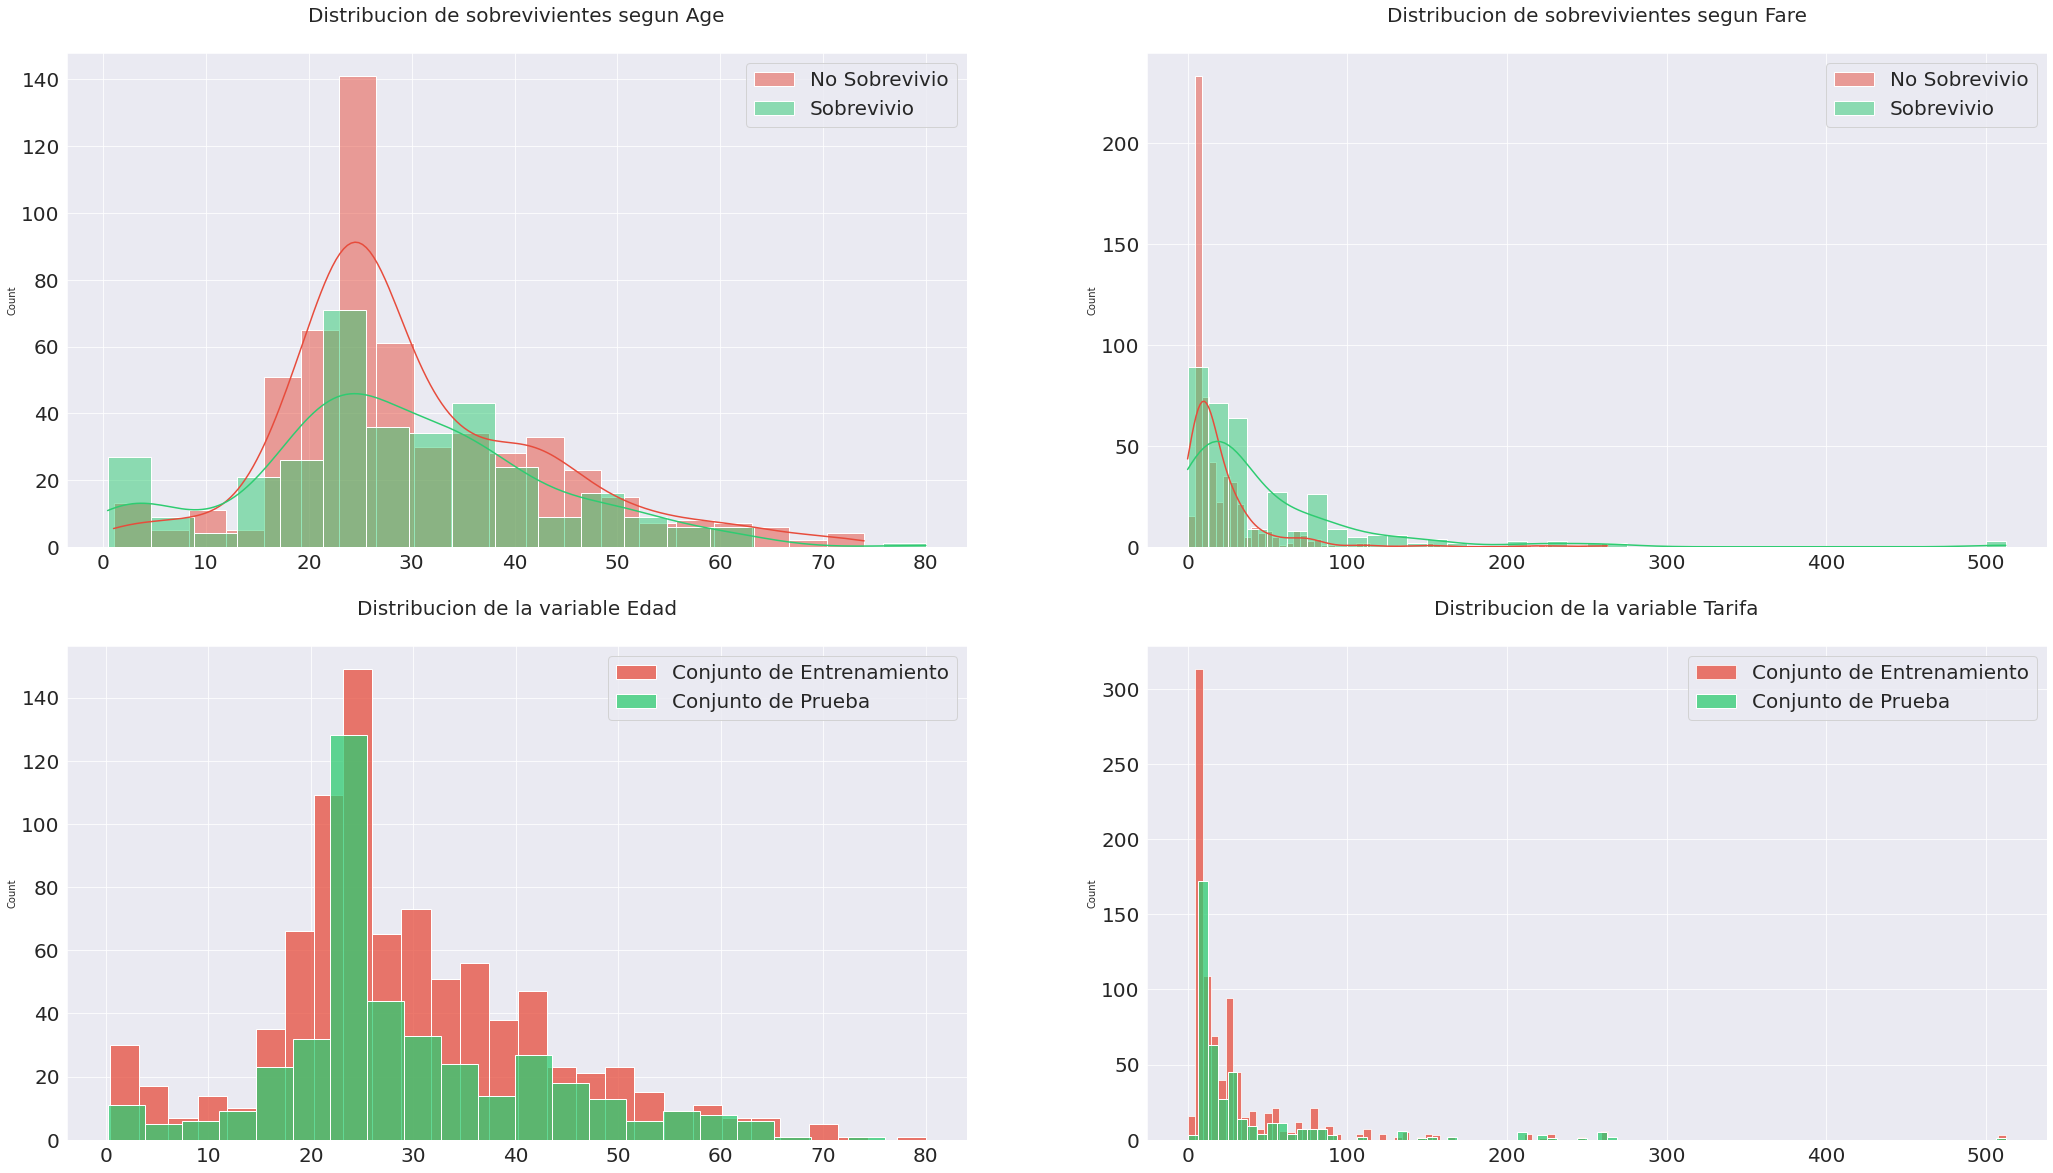

In [285]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.histplot(df_train[~surv][feature], label='No Sobrevivio', kde=True, color='#e74c3c', ax=axs[0][i])
    sns.histplot(df_train[surv][feature], label='Sobrevivio', kde=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.histplot(df_train[feature], label='Conjunto de Entrenamiento', kde=False, color='#e74c3c', ax=axs[1][i])
    sns.histplot(df_test[feature], label='Conjunto de Prueba', kde=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribucion de sobrevivientes segun {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribucion de la variable {}'.format('Edad'), size=20, y=1.05)
axs[1][1].set_title('Distribucion de la variable {}'.format('Tarifa'), size=20, y=1.05)
        
plt.show()

**Variables categoricas**

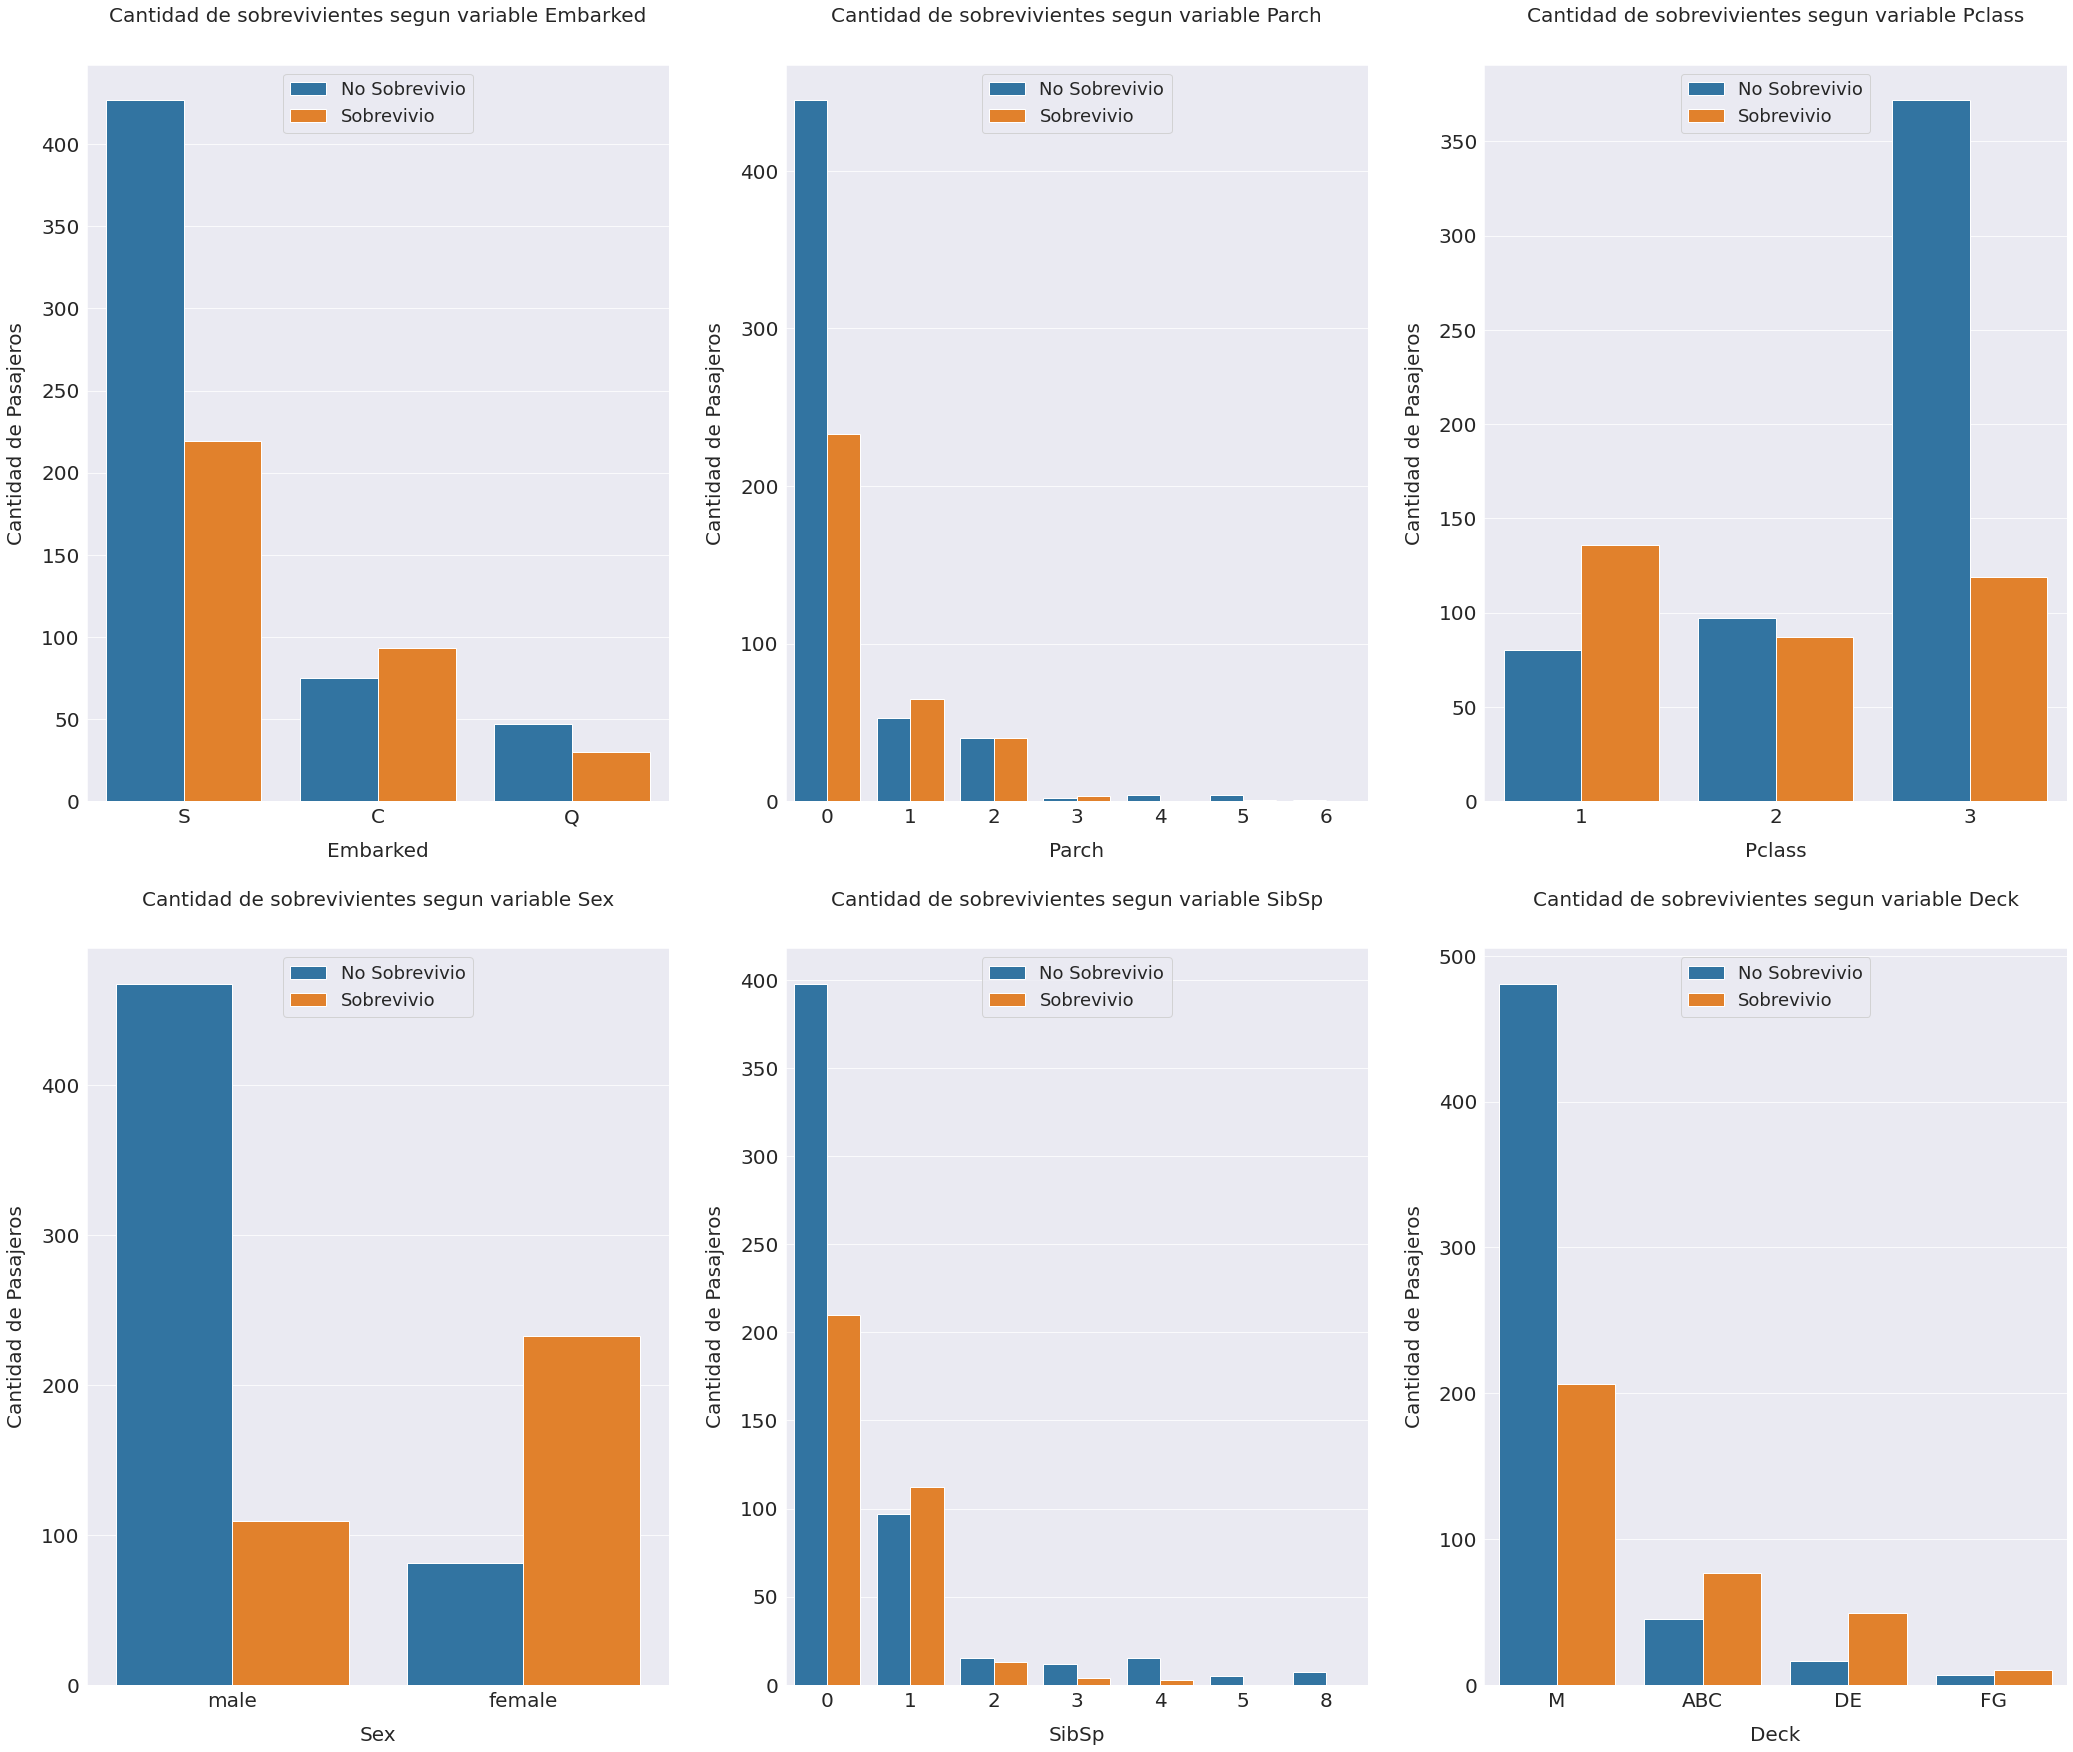

In [286]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)
#print(df_train)
for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Cantidad de Pasajeros', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper center', prop={'size': 18})
    plt.title('Cantidad de sobrevivientes segun variable {}'.format(feature), size=20, y=1.05)

plt.show()

In [287]:
df_all = concat_df(df_train, df_test)
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_cat,fare_range
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,1,"(-0.001, 7.25]"
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,11,"(56.496, 83.475]"
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,3,"(7.896, 8.05]"
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,10,"(34.157, 56.496]"
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,3,"(7.896, 8.05]"


La mayoría de las variables están correlacionadas entre sí. Esta relación se puede utilizar para crear nuevas variables con la transformación de features y la interacción de features. Target encoding también podría ser muy útil debido a las altas correlaciones con la función Survived.

Los puntos de división y los picos son visibles en entidades continuas. Se pueden capturar fácilmente con un modelo de árbol de decisiones, pero es posible que los modelos lineales no puedan detectarlos.

Las variables categóricas tienen distribuciones muy distintas con diferentes tasas de supervivencia. Para esas variables se puede usar one-hot encoding. Algunas de esas variables pueden combinarse entre sí para crear nuevas variables.

Se creó una nueva variable llamada cubierta (deck) y se elimino la variable cabina en la parte de análisis de datos exploratorios.

**III FEATURE ENGINEERING**

En muchas actividades prácticas de ciencia de datos, el conjunto de datos contendrá variables categóricas. Estas variables normalmente se almacenan como valores de texto. Dado que el aprendizaje automático se basa en ecuaciones matemáticas, se generara un problema si mantenemos las variables categóricas como están. Muchos algoritmos admiten valores categóricos sin más manipulación, pero en esos casos, sigue siendo un tema de discusión sobre si codificar las variables o no. Los algoritmos que no soportan valores categóricos, en ese caso, utilizaran metodologías de codificación.

# **Clasificando variables continuas**

**Tarifa**

In [288]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

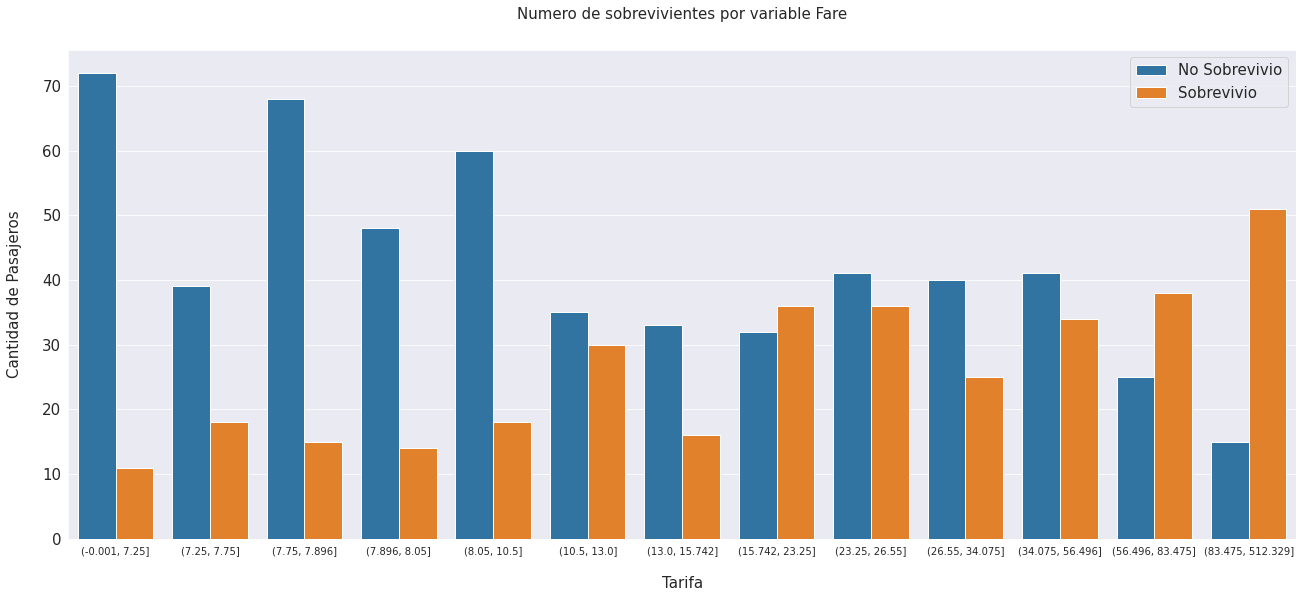

In [289]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Tarifa', size=15, labelpad=20)
plt.ylabel('Cantidad de Pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Numero de sobrevivientes por variable {}'.format('Fare'), size=15, y=1.05)

plt.show()

**Age**

In [290]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

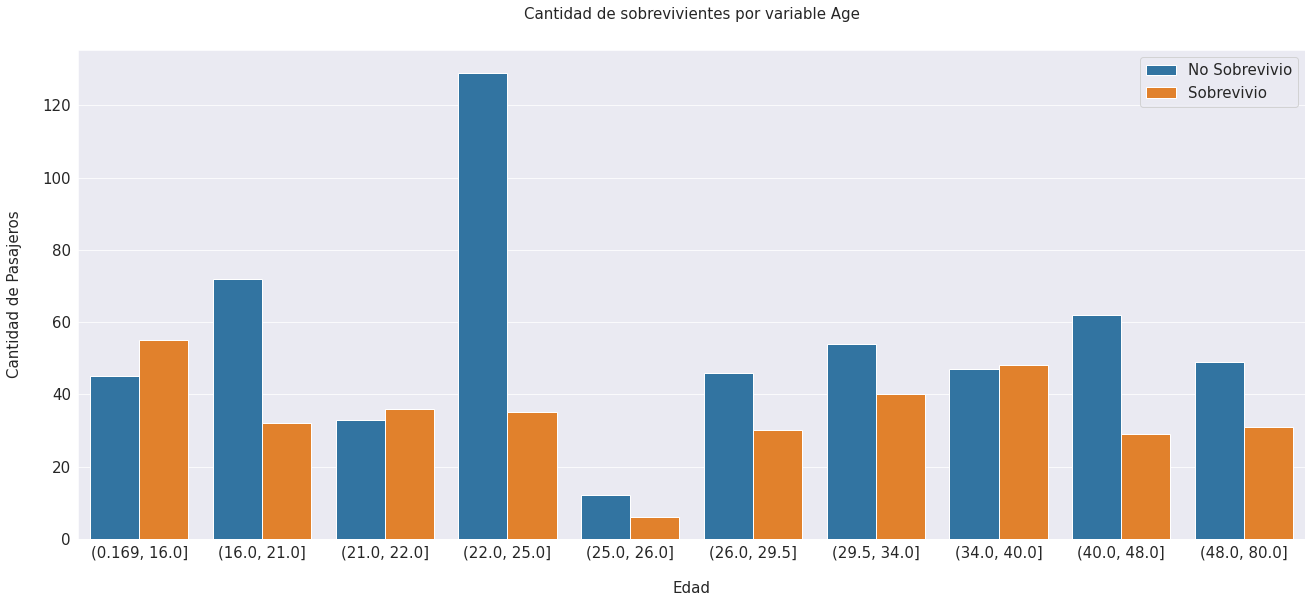

In [291]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Edad', size=15, labelpad=20)
plt.ylabel('Cantidad de Pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Cantidad de sobrevivientes por variable {}'.format('Age'), size=15, y=1.05)


plt.show()

**Codificación de variables categóricas** (Categorical variables encoding)

La mayoría de los algoritmos de aprendizaje automático no pueden manejar variables categóricas a menos que las convirtamos en valores numéricos. El rendimiento de muchos algoritmos varía en función de cómo se codifican las variables categóricas. 
Es esencial comprender que todas estas codificaciones no funcionan bien en todas las situaciones o para todos los conjuntos de datos o para todos los modelos de aprendizaje automático. Los científicos de datos necesitan experimentar y descubrir cuál funciona mejor para un caso específico. Si los datos de prueba tienen diferentes clases, algunos de estos métodos no funcionarán ya que las características no serán similares. Hay pocas publicaciones de referencia en las comunidades de investigación, ***no es concluyente cuál funciona mejor.*** Se debe probar cada uno de estos con los conjuntos de datos más pequeños y luego decidir dónde enfocarse para ajustar el proceso de codificación. 

Hay muchas maneras en que podemos codificar estas variables categóricas como números y usarlas en un algoritmo. Veremos algunas de esas maneras.

# **Frecuency Encoding**

El tamaño de una familia se genera sumando SibSp, Parch y 1. SibSp es el recuento de hermanos y cónyuge, y Parch es el recuento de padres e hijos. Esas columnas se suman para encontrar el tamaño total de las familias. Sumando 1 al final, que es el pasajero actual. Los gráficos han demostrado claramente que el tamaño de la familia es un predictor de supervivencia porque diferentes valores tienen diferentes tasas de supervivencia.

El tamaño de la familia con 1 está etiquetado como Solo

Tamaño familiar con 2, 3 y 4 están etiquetados como pequeños

Tamaño familiar con 5 y 6 están etiquetados como medianos

Tamaño familiar con 7, 8 y 11 están etiquetados como grandes

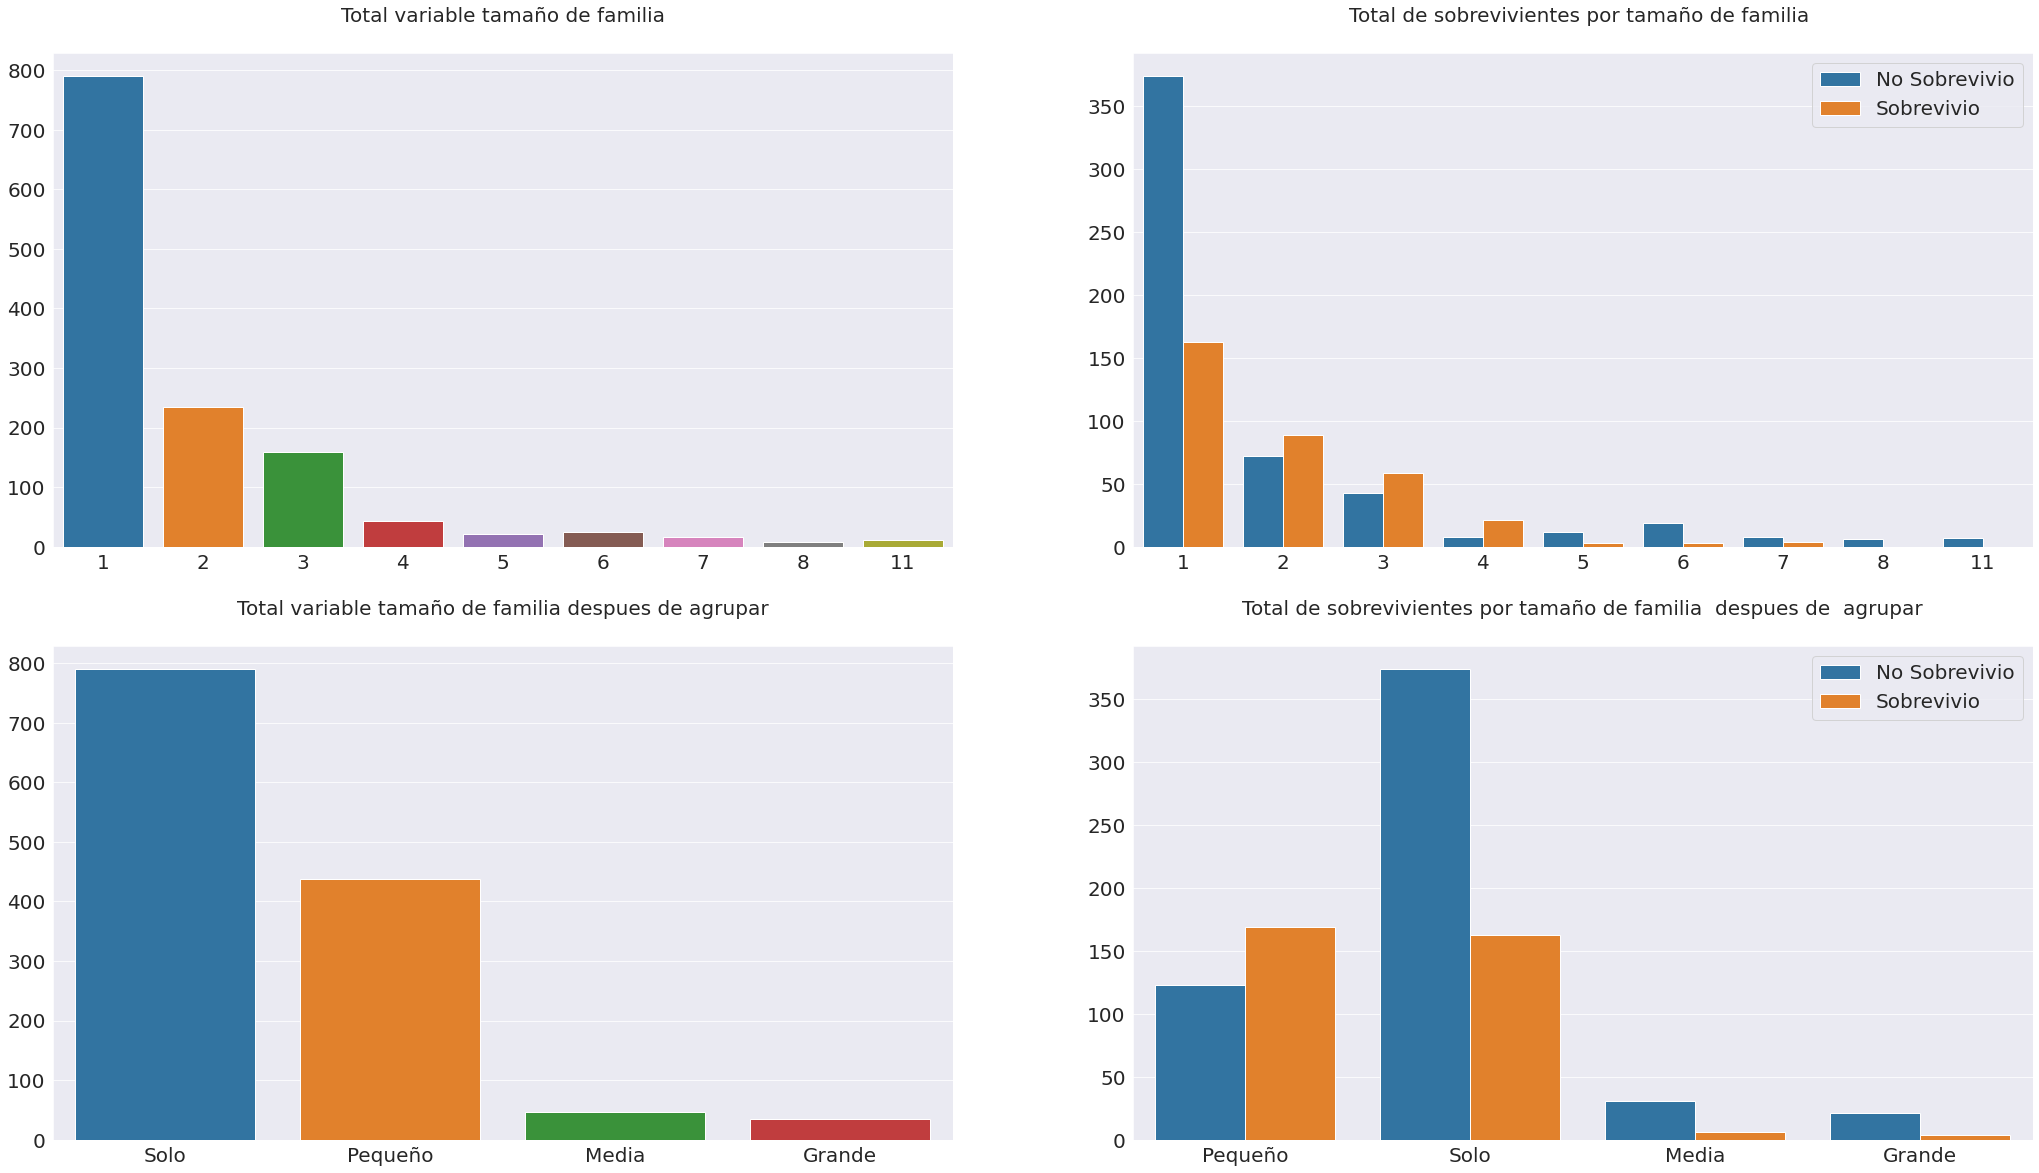

In [292]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Total variable tamaño de familia', size=20, y=1.05)
axs[0][1].set_title('Total de sobrevivientes por tamaño de familia ', size=20, y=1.05)

family_map = {1: 'Solo', 2: 'Pequeño', 3: 'Pequeño', 4: 'Pequeño', 5: 'Media', 6: 'Media', 7: 'Grande', 8: 'Grande', 11: 'Grande'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Total variable tamaño de familia despues de agrupar', size=20, y=1.05)
axs[1][1].set_title('Total de sobrevivientes por tamaño de familia  despues de  agrupar', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Hay demasiados valores de Ticket para analizar, por lo que agruparlos por sus frecuencias facilitara las cosas.
¿En qué se diferencia este feature de Family_Size? Muchos pasajeros viajaban en grupos. 
Esos grupos están formados por amigos, niñeras, empleadas domésticas, etc. No se contaban como familia, pero usaban el mismo boleto.

¿Por qué no agrupar las entradas por sus prefijos? Si los prefijos en la función Ticket tienen algún significado, 
entonces ya están capturados en las variables Pclass o Embarked porque esa podría ser la única información lógica que se puede derivar de la función Ticket.
De acuerdo con el gráfico a continuación, los grupos con 2, 3 y 4 miembros tuvieron una mayor tasa de supervivencia. 
Los pasajeros que viajan solos tienen la tasa de supervivencia más baja. 
Después de 4 miembros del grupo, la tasa de supervivencia disminuye drásticamente. 
Este patrón es muy similar a la función Family_Size pero hay pequeñas diferencias. 
Los valores de Ticket_Frequency no se agrupan como Family_Size porque eso básicamente crearía la misma función con una correlación perfecta. 
Este tipo de característica no proporcionaría ninguna ganancia de información adicional.

In [293]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

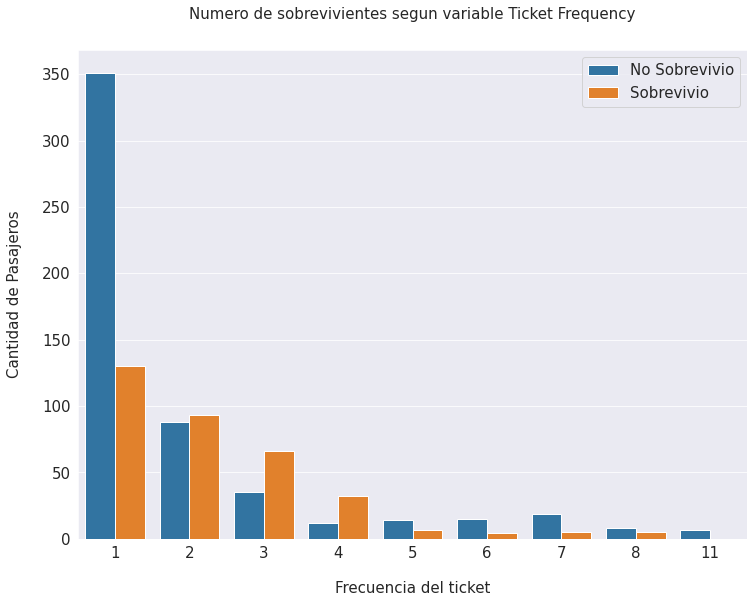

In [294]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Frecuencia del ticket', size=15, labelpad=20)
plt.ylabel('Cantidad de Pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Numero de sobrevivientes segun variable {}'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

# **Title & Is Married**

El título se crea extrayendo el prefijo antes del Nombre. Según el gráfico a continuación, hay muchos títulos que aparecen muy pocas veces. Algunos de esos títulos no parecen correctos y necesitan ser reemplazados. Los títulos Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona se reemplazan con Miss/Mrs/Ms porque todos ellos son mujeres. Valores como Mlle, Mme y Dona son en realidad el nombre de los pasajeros, pero se clasifican como títulos porque la función Nombre está dividida por comas. Los títulos Dr, Col, Major, Jonkheer, Capt, Sir, Don y Rev se reemplazan con Dr/Military/Noble/Clergy porque esos pasajeros tienen características similares. Maestro es un título único. Se administra a pasajeros varones menores de 26 años. Tienen la tasa de supervivencia más alta entre todos los hombres.

Is_Married es una función binaria basada en el título de señora. El título de señora tiene la tasa de supervivencia más alta entre otros títulos femeninos. Este título debe ser una característica porque todos los títulos femeninos se agrupan entre sí.

In [295]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

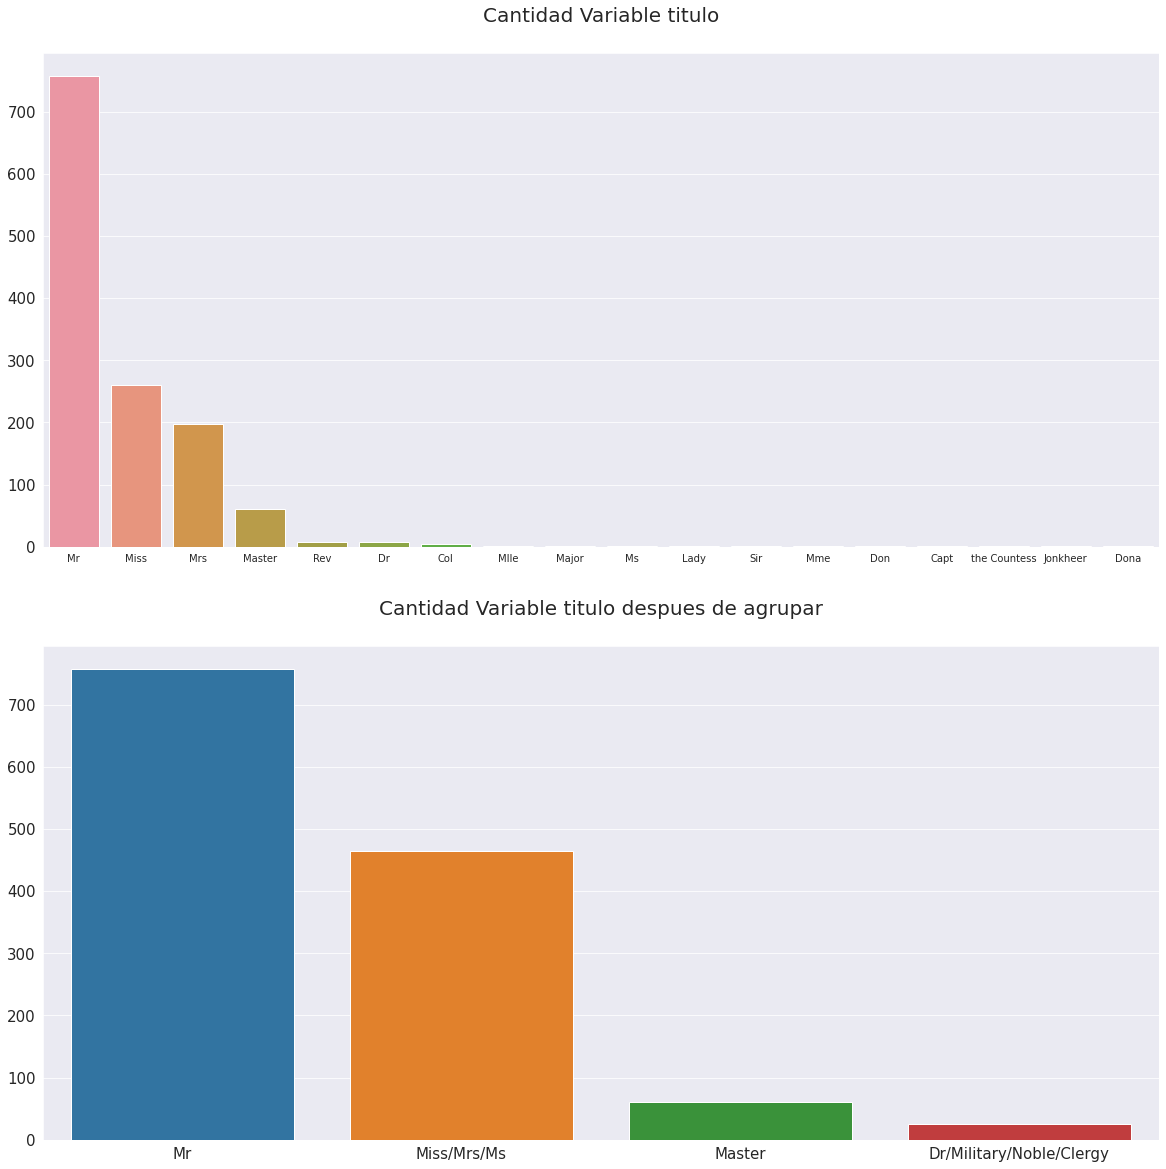

In [296]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Cantidad Variable titulo', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Cantidad Variable titulo despues de agrupar', size=20, y=1.05)

plt.show()

# **Target Encoding**

La función extract_surname se utiliza para extraer los apellidos de los pasajeros de la variable Nombre. La variable familia se crea con el apellido extraído. Esto es necesario para agrupar a los pasajeros en una misma familia.

In [297]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

Family_Survival_Rate se calcula a partir de las familias en el conjunto de entrenamiento, ya que no hay una variable Survived en el conjunto de prueba. Se crea una lista de nombres de familias que aparecen tanto en el conjunto de entrenamiento como en el de prueba (non_unique_families). La tasa de supervivencia se calcula para familias con más de 1 miembro en esa lista y se almacena en la función Family_Survival_Rate.

Se crea una función binaria adicional Family_Survival_Rate_NA para familias que son exclusivas del conjunto de prueba. Esta característica también es necesaria porque no hay forma de calcular la tasa de supervivencia de esas familias. Esta característica implica que la tasa de supervivencia familiar no se aplica a esos pasajeros porque no hay forma de recuperar su tasa de supervivencia.

Las funciones Ticket_Survival_Rate y Ticket_Survival_Rate_NA también se crean con el mismo método. Ticket_Survival_Rate y Family_Survival_Rate se promedian y se convierten en Survival_Rate, y Ticket_Survival_Rate_NA y Family_Survival_Rate_NA también se promedian y se convierten en Survival_Rate_NA.

In [298]:
# Creamos una lista de familias y tickets que ocurren en los conjuntos de entrenamiento y prueba
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Validando si una familia existe tanto en el conjunto de entrenamiento como en el de prueba, y que sus miembros sean mas de 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Validando si un ticket existe tanto en el conjunto de entrenamiento como en el de prueba,  y que sus miembros sean mas de 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [299]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [300]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

# **Feature transformation**

**Label Encoding Non-Numerical Features**

Embarked, Sex, Deck, Title y Family_Size_Grouped son de tipo objeto, y las funciones Age y Fare son tipos categoricos. Se convierten a tipo numérico con 
LabelEncoder. LabelEncoder básicamente etiqueta las clases de 0 a n. Este proceso es necesario para que los modelos aprendan de esas características.

In [301]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

**One-Hot Encoding the Categorical Features**

Las variables categóricas (Pclass, Sex, Deck, Embarked, Title) se convierten en funciones codificadas one-hot con OneHotEncoder. Las características de Age y Fare no se convierten porque son ordinales a diferencia de las anteriores.


In [302]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

Las variables Age y Fare están agrupadas. Binning ayudó a lidiar con los valores atípicos y reveló algunos grupos homogéneos en esas características. Family_Size se crea agregando las variables Parch, SibSp y 1. Ticket_Frequency se crea contando la ocurrencia de valores de Ticket.

La variable Name es muy útil. En primer lugar, las funciones Título e Is_Married se crean a partir del prefijo del título en los nombres. En segundo lugar, las funciones Family_Survival_Rate y Family_Survival_Rate_NA se crean mediante la codificación de destino del apellido de los pasajeros. Ticket_Survival_Rate se crea via Target Encoding de la variable Ticket. La función Survival_Rate se crea promediando las funciones Family_Survival_Rate y Ticket_Survival_Rate.

Finalmente, las características de tipo no numérico son label encoding y las características categóricas son one-hot encoding. Se creo 5 features nuevos (Family_Size, Title, Is_Married, Survival_Rate y Survival_Rate_NA) y se eliminaron las variables inútiles después de la codificación.

In [303]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,...,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4,age_cat,fare_cat,fare_range
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.383838,0.0,1,0.0,0.0,0.0,1.0,1,1,"(-0.001, 7.25]"
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.000000,1.0,2,0.0,0.0,1.0,0.0,2,11,"(56.496, 83.475]"
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.383838,0.0,1,0.0,0.0,1.0,0.0,1,3,"(7.896, 8.05]"
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.383838,0.0,2,0.0,0.0,1.0,0.0,2,10,"(34.157, 56.496]"
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.383838,0.0,1,0.0,0.0,0.0,1.0,2,3,"(7.896, 8.05]"
